In [1]:
import desitarget 
from desitarget.targets import desi_mask, bgs_mask, mws_mask

from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
print(os.getcwd())


/global/u1/e/edown/code/project/clustering_sv3


! ls /global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS*

Calculating fsky with randoms

with open('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/BGS_ANY_N_nz.txt') as file:
    print('N')
    print(file.read())
    
with open('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/BGS_ANY_S_nz.txt') as file:
    print('S')
    print(file.read())

In [3]:
A = 86.4016 + 87.3556
print(A)

173.7572


In [4]:
N0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_0_clustering.ran.fits')
S0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_S_0_clustering.ran.fits')

filelist_N = glob.glob('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_*_clustering.ran.fits')
filelist_S = glob.glob('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_S_*_clustering.ran.fits')

filelist = filelist_N + filelist_S
print(np.shape(filelist))
randoms = Table(names=(np.array(N0.dtype.names)), dtype=N0.dtype)

for f in filelist:
    print(f)
    randoms = np.hstack((randoms,Table.read(f)))
    
randoms = Table(randoms)

In [5]:
#print(np.shape(randoms)[0])
print(np.shape(N0)[0] + np.shape(S0)[0])
sky_area = 4*np.pi*np.rad2deg(1)**2
print(sky_area)
survey_area = 434393 / 2500 #randoms / deg^2
print(survey_area) # in deg^2
fsky = survey_area/sky_area
print(fsky)

A = 86.4016 + 87.3556
print(A)

fsky_hdr = A/sky_area
print(fsky_hdr)



434393
41252.96124941928
173.7572
0.004211993387564293
173.7572
0.004211993387564293


Reading data

In [6]:
N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_clustering.dat.fits')
S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_S_clustering.dat.fits')
N['APPLIM'] = 19.539993
S['APPLIM'] = 19.5

N_bright = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits')
S_bright = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits')
N_bright['APPLIM'] = 19.539993
S_bright['APPLIM'] = 19.5
N_bright['ZLIM_UPPER'] = 0.6
S_bright['ZLIM_UPPER'] = 0.6

In [7]:
N

RA,DEC,TARGETID,NTILE,TILES,Z,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,WEIGHT_ZFAIL,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP,APPLIM
float64,float64,int64,int64,bytes43,float64,float64,float64,float64,float64,int64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
191.14757099005186,60.345815959235,39633390185480938,1,100,0.2819459922463374,0.4318181818181818,3.0,1.5743490921284766,0.3333333333333333,-8790991219464744880 .. -4387867067969646830,0.3203125,1.0,3.0714285714285716,6.782468,16.732075,29.996437,31.939342,25.343126,0.6031055527358372,-0.0007029256786438565,0.3765973290806362,0.21603985022885944,0.6418090846178732,0.5546365731061034,-0.27348761247894726,-0.27348761247894726,-20.30376568408361,0.0076878089647186044,0.0189012692383565,19.539993
187.05117249536465,62.614542270156655,39633416324383107,1,100,0.2703579310142208,0.4318181818181818,3.0,1.5579854421783794,1.0,-1 .. -1,1.0,1.0,1.0,4.4575434,17.798513,37.420948,46.075268,30.963612,0.9961770755006489,0.146409873660811,0.6534524026523496,0.3797334250181883,1.0502045184025013,0.8327485111078745,-0.2622471930837942,-0.2622471930837942,-20.42505494547267,0.0076878089647186044,0.0189012692383565,19.539993
187.83760708675698,60.38987543677365,39633393155049303,1,100,0.1731108191825362,0.4318181818181818,3.0,1.7267282368438097,0.2,-6539912815536352385 .. 9025372152329235987,0.546875,1.0,1.8169014084507042,13.26433,27.728409,46.020153,37.03337,25.867756,0.6595463164766608,-0.04866411688213576,0.09238961852108621,0.17196093424278175,0.3785062363399163,0.5940547497827482,-0.16791749460706012,-0.16791749460706012,-19.719994580683654,0.017861571797760857,0.008223843310435642,19.539993
188.7298325265811,60.181046704454054,39633390164510257,1,100,0.2854181586411897,0.4318181818181818,3.0,1.7154596184117625,0.3333333333333333,601583918157758562 .. -8934769733576671188,0.265625,1.0,3.6857142857142855,9.799708,23.07847,40.24855,43.608025,32.920425,0.5506603859408487,-0.027984211522950803,0.35134044892291943,0.17986420125298275,0.5984338493516907,0.5114153982880107,-0.276855613881954,-0.276855613881954,-20.65269989753773,0.0076878089647186044,0.0189012692383565,19.539993
187.04622815471808,60.82670180284912,39633396124617897,1,100,0.37400455377945924,0.4318181818181818,3.0,1.6801915534232357,1.0,-1 .. -1,1.0,1.0,1.0,4.046807,16.82531,38.79777,85.02852,54.11833,0.8657535543881233,0.2757199965785285,0.9570932122099367,0.5034037640174682,1.319054690619937,0.7314758434170625,-0.36278441716607546,-0.36278441716607546,-21.20717884549835,0.0025093016341671114,0.055734255355941044,19.539993
189.28672536137475,60.18713259808659,39633390168704731,1,100,0.21452305283357412,0.4318181818181818,3.0,1.6400346453345047,1.0,2333715480473687758 .. -1431821843982627288,0.4921875,1.0,2.015625,6.3314033,19.638945,38.222126,43.818123,28.204218,0.9059159293142172,0.04341174620827673,0.3665416848139814,0.27036648397159835,0.7431065827594778,0.7563057691320424,-0.2080873612485669,-0.2080873612485669,-19.915113465885533,0.014175378619991408,0.010340274472459292,19.539993
188.7327720032468,60.217374759371836,39633390164510283,1,100,0.23282508447174644,0.4318181818181818,3.0,1.680631967400249,0.25,-1 .. -1,1.0,1.0,1.0,14.161283,45.448513,84.034935,83.2855,57.59129,0.8939001425702994,0.06443304616627457,0.43657561294656116,0.29160589516251845,0.8087714571397985,0.7488771473733059,-0.22584033193759404,-0.22584033193759404,-21.029216752429768,0.013312673657954965,0.011002985286624948,19.539993
189.20703625254848,60.13450219401336,39633390168704208,1,100,0.1842724056985206,0.4318181818181818,3.0,1.6990866107210438,0.3333333333333333,-1 .. -1,1.0,1.0,1.0,20.873507,47.31153,86.10893,73.21894,58.1018,0.7111367437973818,-0.0307418

In [8]:
S.dtype.names

('RA',
 'DEC',
 'TARGETID',
 'NTILE',
 'TILES',
 'Z',
 'COMP_TILE',
 'rosette_number',
 'rosette_r',
 'FRACZ_TILELOCID',
 'BITWEIGHTS',
 'PROB_OBS',
 'WEIGHT_ZFAIL',
 'WEIGHT',
 'flux_g_dered',
 'flux_r_dered',
 'flux_z_dered',
 'flux_w1_dered',
 'flux_w2_dered',
 'REST_GMR_0P1',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'EQ_ALL_0P0',
 'EQ_ALL_0P1',
 'ABSMAG_R',
 'NZ',
 'WEIGHT_FKP',
 'APPLIM')

In [9]:
data = Table(np.hstack((N,S))) #BGS ANY in N, S combined
data['ZLIM_UPPER'] = 0.6
data_bright = Table(np.hstack((N_bright,S_bright))) #BGS BRIGHT in N, S combined


In [79]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['font.size'] = 15
print(plt.rcParams["font.sans-serif"][0])
print(plt.rcParams["font.monospace"][0])
print(plt.rcParams["font.serif"][0])

DejaVu Sans
DejaVu Sans Mono
Times New Roman


Plot - absmag histogram

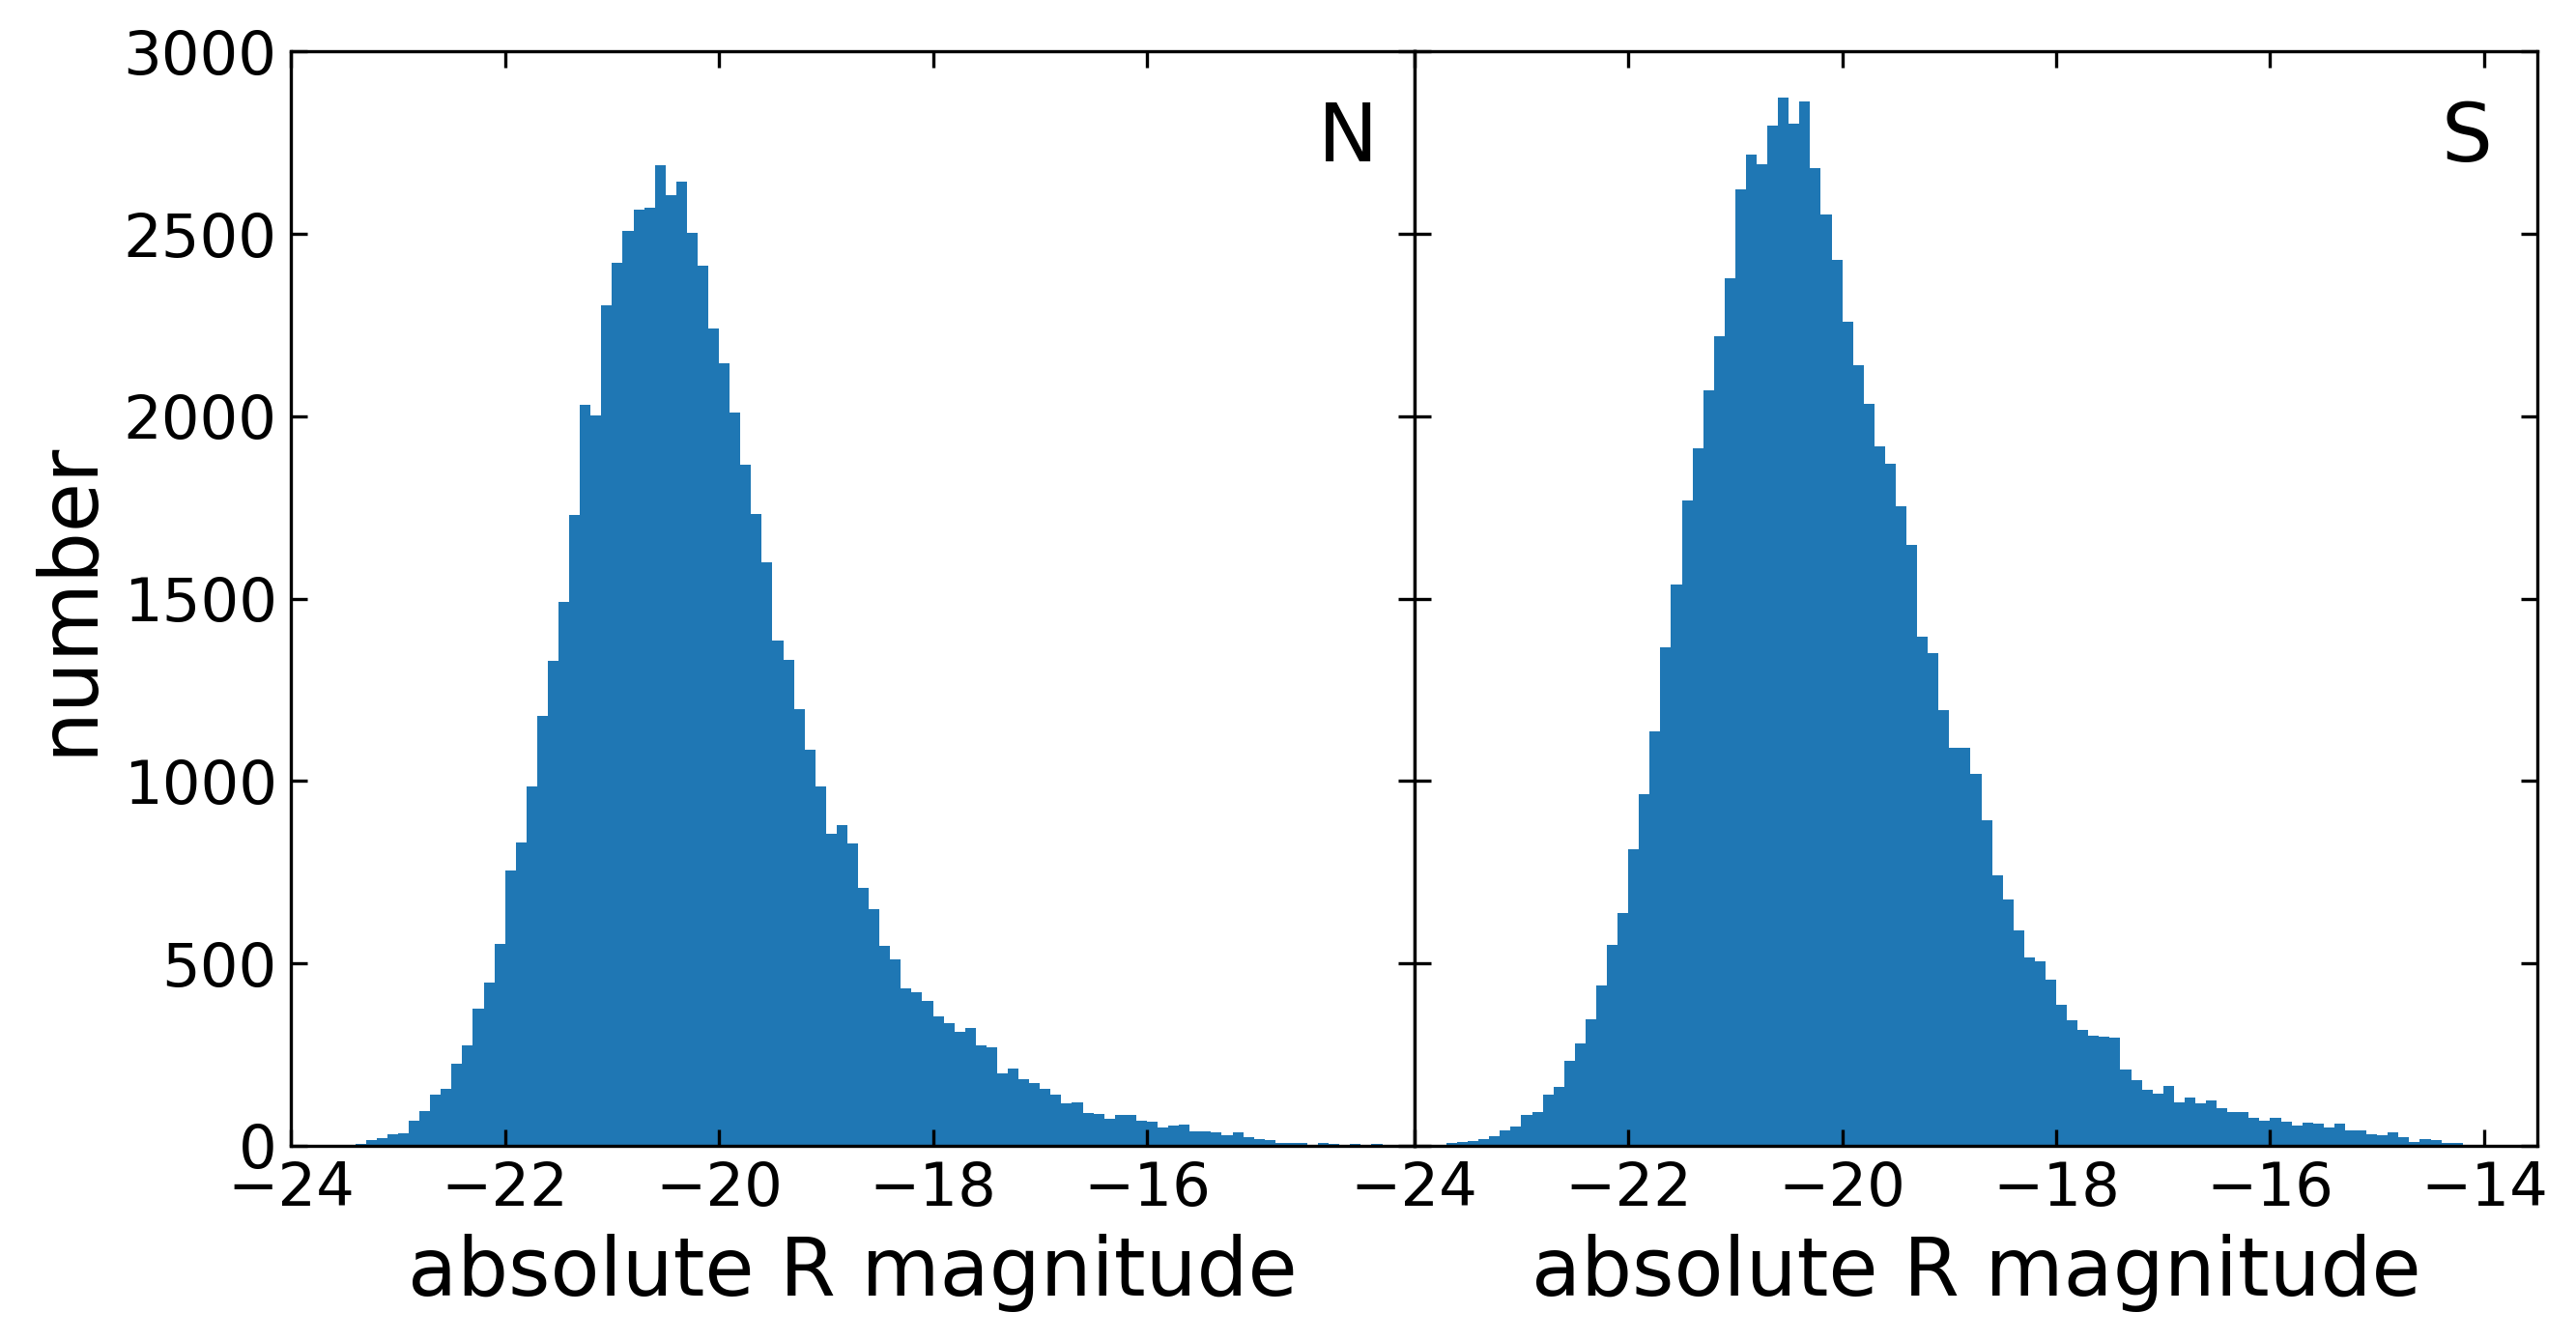

In [11]:
s=20
plt.figure(figsize=(10,5),dpi=300)
M_range = np.arange(-25,-10,0.1)
ax1 = plt.subplot(121)
plt.text(-14.4,2700,'N', size=s)
ax1.hist(N_bright['ABSMAG_R'], bins=M_range)
plt.xlabel('absolute R magnitude', size=s)
plt.ylabel('number', size=s)
plt.ylim(0,3000)
plt.xlim(-24,-13.5)
plt.xticks([-24,-22,-20,-18,-16])
#ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

ax2 = plt.subplot(122)
plt.text(-14.4,2700, 'S', size=s)
ax2.hist(S_bright['ABSMAG_R'], bins=M_range)
plt.xlabel('absolute R magnitude', size=s)
ax2.set_yticklabels([])
plt.ylim(0,3000)
plt.xlim(-24,-13.5)
#ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.subplots_adjust(wspace=0)

plt.savefig('../figures/interim/sv3_abs_rmag_hist.png')

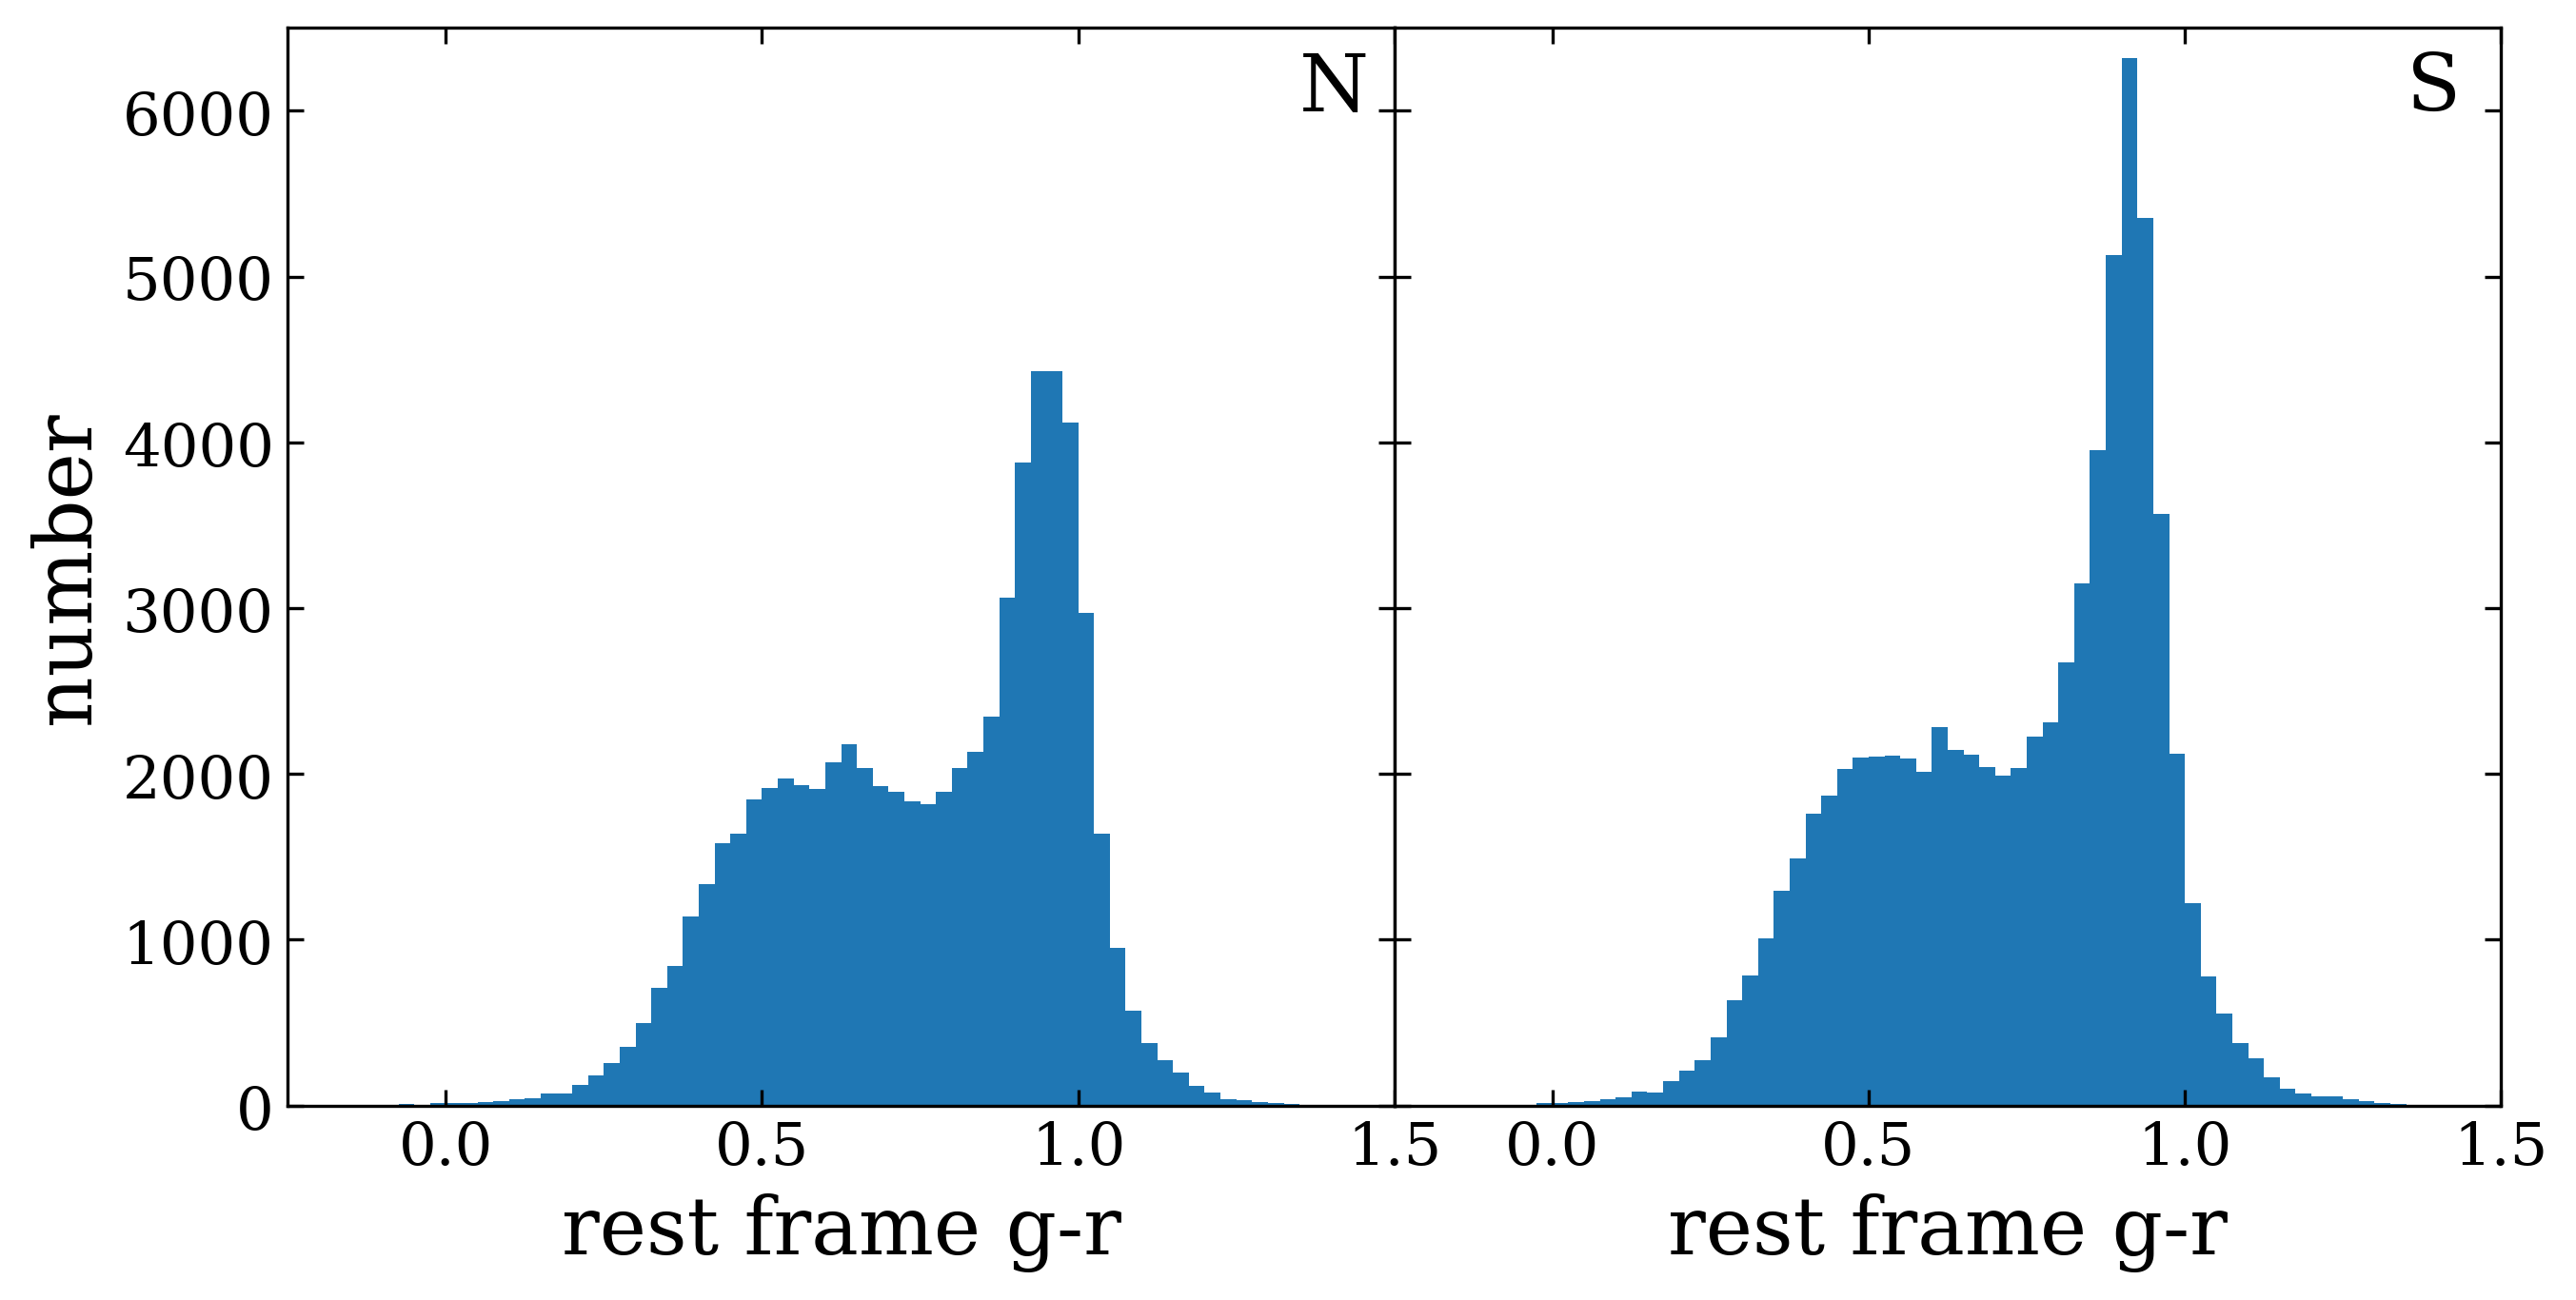

In [12]:
s=20
plt.figure(figsize=(10,5),dpi=300)
ax1 = plt.subplot(121)
plt.text(1.35,6000, 'N',size=s)
hist_N = ax1.hist(N_bright['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025))
"""yerr_N = np.sqrt(1/hist_N[0])
print(hist_N[0])
ax1.errorbar(hist_N[1][1:],hist_N[0], yerr=yerr_N, lw=0, elinewidth=5, capsize=5, label='error')"""
plt.xlabel('rest frame g-r',size=s)
plt.ylabel('number',size=s)
plt.ylim(0,6500)
plt.xlim(-0.25,1.5)
#plt.legend()

ax2 = plt.subplot(122)
plt.text(1.35,6000, 'S',size=s)
hist_S = ax2.hist(S_bright['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025))
"""yerr_S = np.sqrt(1/hist_S[0])
print(hist_S[0])
ax2.errorbar(hist_S[1][1:],hist_S[0], yerr=yerr_S, lw=0, elinewidth=5, capsize=5, label='error')"""
plt.xlabel('rest frame g-r',size=s)
plt.ylim(0,6500)
plt.xlim(-0.25,1.5)
ax2.set_yticklabels([])
ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.subplots_adjust(wspace=0)

plt.savefig('../figures/interim/sv3_bright_restcolour_hist.png')

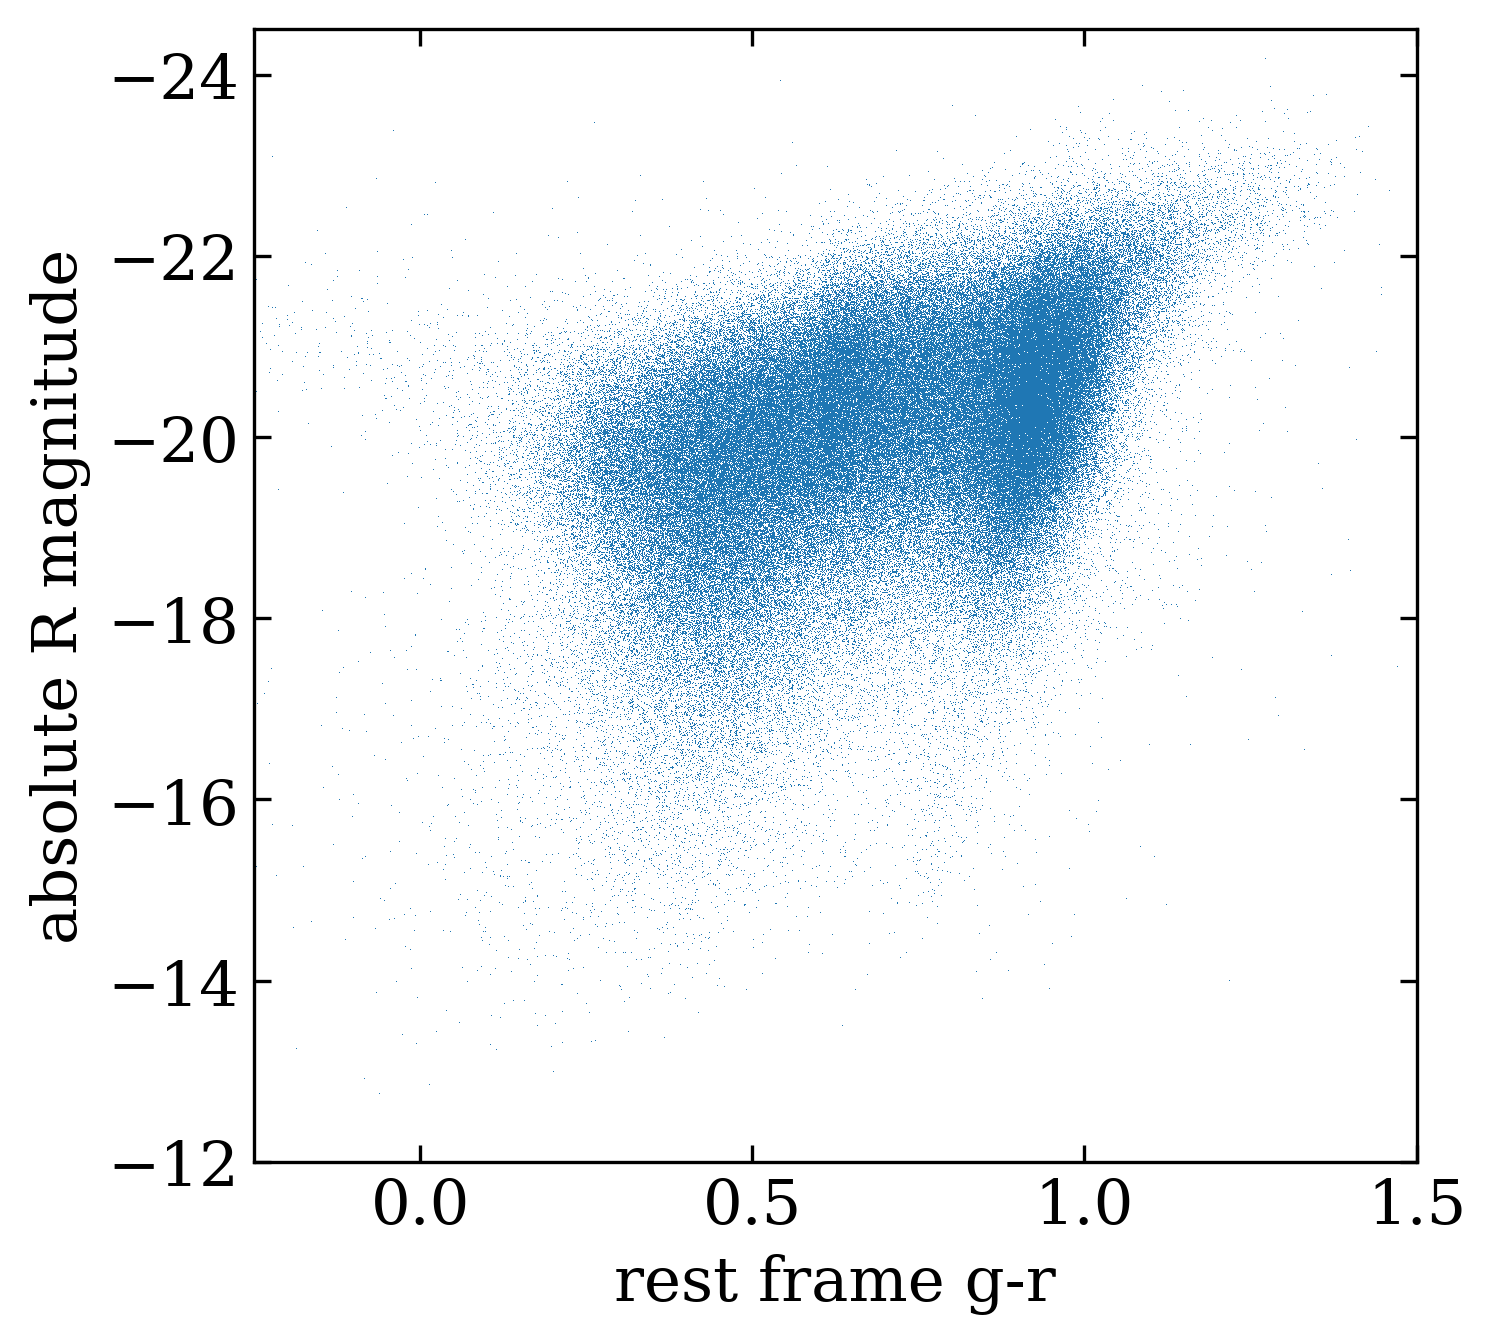

In [44]:
fig, ax = plt.subplots(figsize=(5,5),dpi=300)

plt.plot(data['REST_GMR_0P1'], data['ABSMAG_R'], lw=0, marker=',')
plt.xlabel('rest frame g-r')
plt.ylabel('absolute R magnitude')
plt.xlim(-0.25,1.5)
plt.ylim(-24.5,-12)
plt.gca().invert_yaxis()

ax.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
plt.savefig('../figures/interim/sv3_colour_magnitude.png')

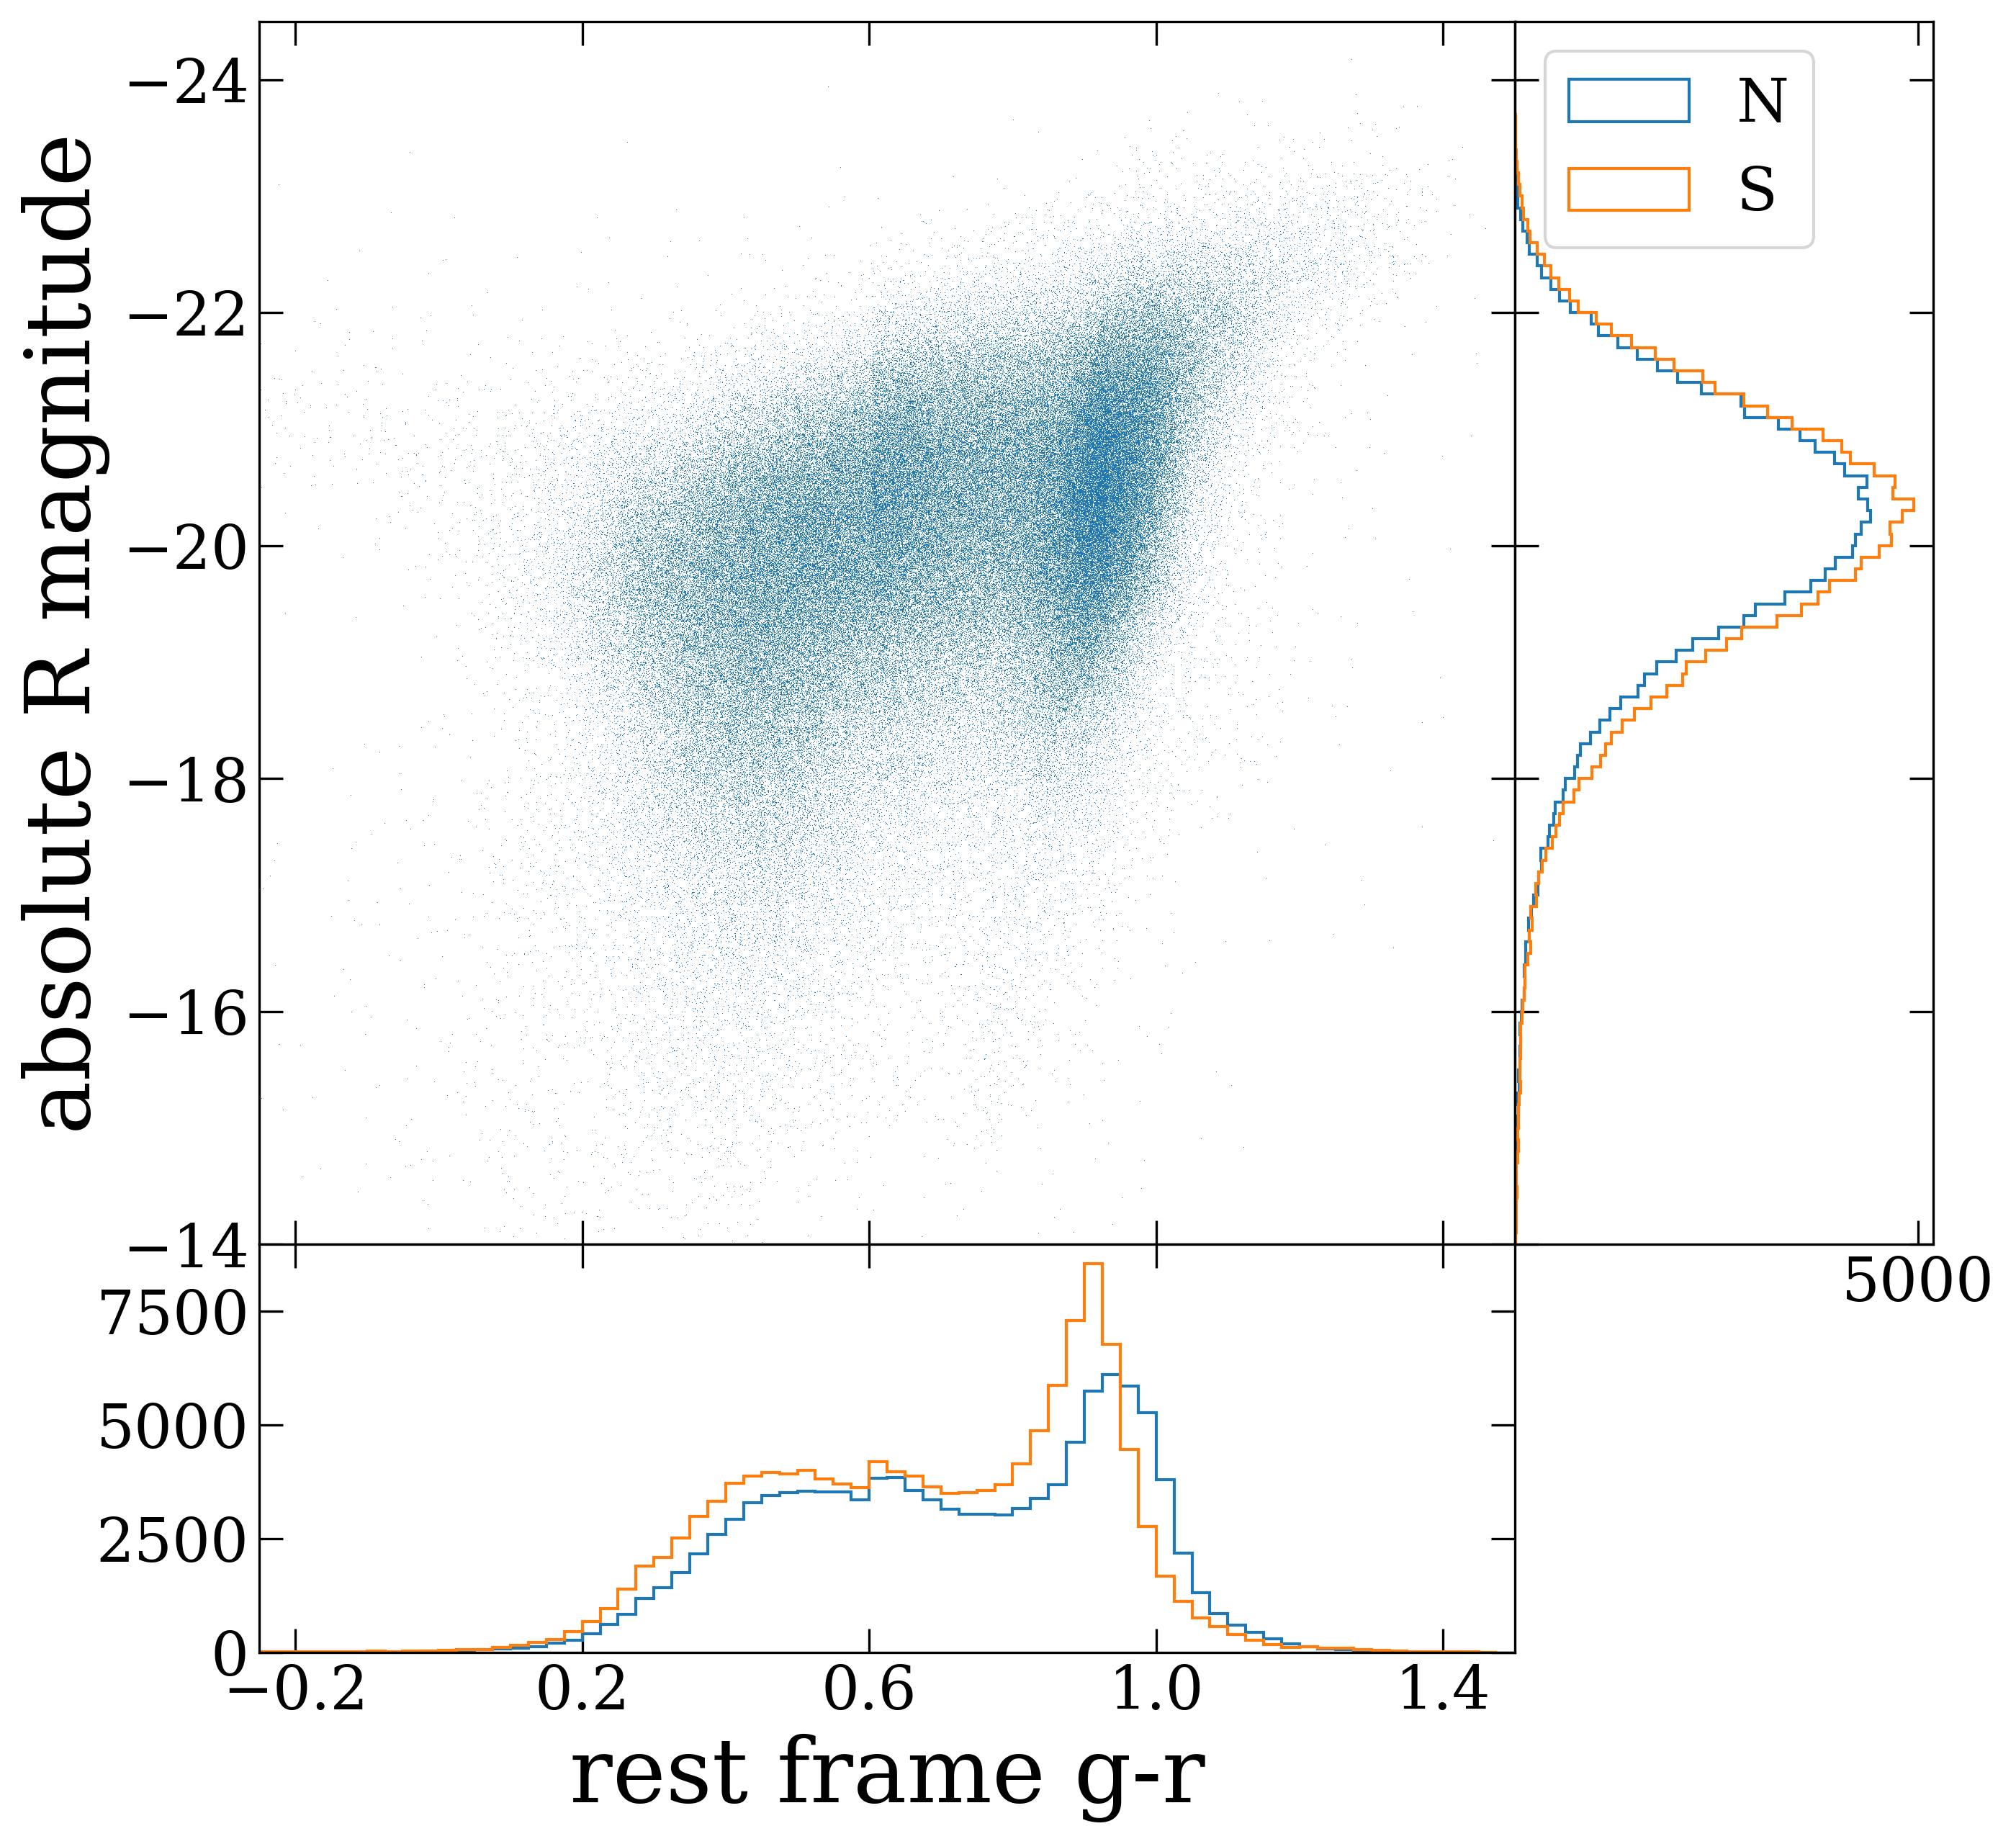

In [98]:
s=30
fig = plt.figure(figsize=(10,10),dpi=300)
gs = fig.add_gridspec(4, 4)

ax1 = fig.add_subplot(gs[:3, :3])
ax1.plot(data['REST_GMR_0P1'], data['ABSMAG_R'], lw=0, marker=',') #,bins=[10000,100])#
plt.ylabel('absolute R magnitude', size=s)
plt.xlim(-0.25,1.5)
plt.ylim(-24.5,-14)
plt.gca().invert_yaxis()
plt.xticks(np.arange(-0.2,1.8,0.4))
ax1.set_xticklabels([])
plt.xticks(fontsize=s-10)
plt.yticks(fontsize=s-10)

ax2 = fig.add_subplot(gs[:3, 3])
ax2.hist(N['ABSMAG_R'], bins=np.arange(-25,-10,0.1),orientation='horizontal', histtype='step', label='N')
ax2.hist(S['ABSMAG_R'], bins=np.arange(-25,-10,0.1),orientation='horizontal', histtype='step', label='S')
plt.ylim(-24.5,-14)
plt.gca().invert_yaxis()

ax2.set_yticklabels([])
plt.xticks([5000], fontsize=s-10)
plt.legend(loc='upper left', fontsize=s-10)
plt.yticks(fontsize=s-10)

ax3 = fig.add_subplot(gs[3, :3])
ax3.hist(N['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), histtype='step')
ax3.hist(S['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), histtype='step')
plt.xlabel('rest frame g-r', size=s)
plt.xlim(-0.25,1.5)
plt.xticks(np.arange(-0.2,1.8,0.4), fontsize=s-10)
plt.yticks(fontsize=s-10)


ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8)
ax3.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8)


plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('../figures/interim/sv3_dists.png', bbox_inches='tight')

(array([     2,      7,     15, ..., 241737, 241740, 241745]),)


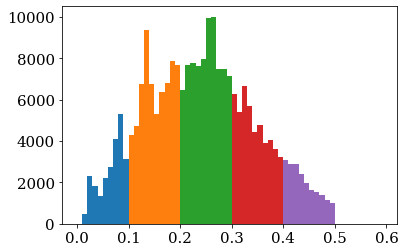

In [13]:
z01 = np.where(np.logical_and(data['Z'] > 0, data['Z'] < 0.1))
z12 = np.where(np.logical_and(data['Z'] > 0.1, data['Z'] < 0.2))
z23 = np.where(np.logical_and(data['Z'] > 0.2, data['Z'] < 0.3))
z34 = np.where(np.logical_and(data['Z'] > 0.3, data['Z'] < 0.4))
z45 = np.where(np.logical_and(data['Z'] > 0.4, data['Z'] < 0.5))
print(z12)
plt.figure()
plt.hist(data['Z'][z01], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z12], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z23], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z34], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z45], bins=np.arange(0,0.6,0.01))
plt.show()


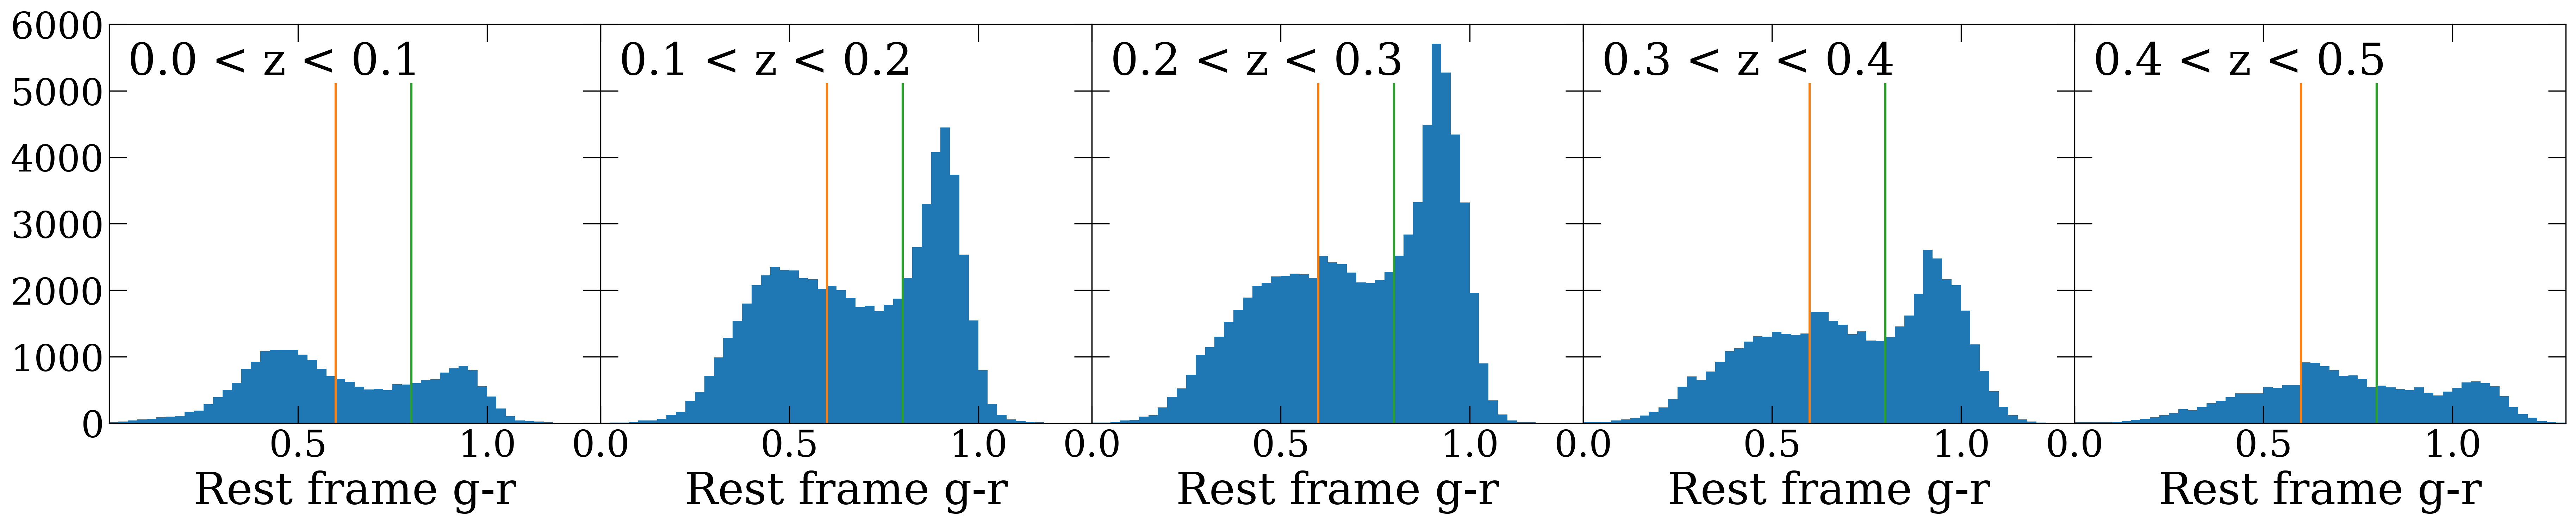

In [99]:
size=70
plt.figure(figsize=(30,5),dpi=300)
ylim=6000
ax1 = plt.subplot(151)
plt.text(0.05,5250,'0.0 < z < 0.1', size=s)
plt.hist(data['REST_GMR_0P1'][z01], bins=np.arange(-0.5,1.5,0.025))
plt.plot([0.6,0.6],[0,ylim-900])
plt.plot([0.8,0.8],[0,ylim-900])
plt.xlabel('Rest frame g-r', fontsize=s)
plt.ylim(0,ylim)
plt.xlim(0,1.3)
plt.xticks([0.5,1],fontsize=s-5)
plt.yticks(fontsize=s-5)

ax2 = plt.subplot(152)
plt.text(0.05,5250,'0.1 < z < 0.2', size=s)
plt.hist(data['REST_GMR_0P1'][z12], bins=np.arange(-0.5,1.5,0.025))
plt.plot([0.6,0.6],[0,ylim-900])
plt.plot([0.8,0.8],[0,ylim-900])
plt.xlabel('Rest frame g-r', fontsize=s)
plt.ylim(0,ylim)
plt.xlim(0,1.3)
plt.xticks([0,0.5,1],fontsize=s-5)

ax3 = plt.subplot(153)
plt.text(0.05,5250,'0.2 < z < 0.3', size=s)
plt.hist(data['REST_GMR_0P1'][z23], bins=np.arange(-0.5,1.5,0.025))
plt.plot([0.6,0.6],[0,ylim-900])
plt.plot([0.8,0.8],[0,ylim-900])
plt.xlabel('Rest frame g-r', fontsize=s)
plt.ylim(0,ylim)
plt.xlim(0,1.3)
plt.xticks([0,0.5,1],fontsize=s-5)

ax4 = plt.subplot(154)
plt.text(0.05,5250,'0.3 < z < 0.4', size=s)
plt.hist(data['REST_GMR_0P1'][z34], bins=np.arange(-0.5,1.5,0.025))
plt.plot([0.6,0.6],[0,ylim-900])
plt.plot([0.8,0.8],[0,ylim-900])
plt.xlabel('Rest frame g-r', fontsize=s)
plt.ylim(0,ylim)
plt.xlim(0,1.3)
plt.xticks([0,0.5,1],fontsize=s-5)

ax5 = plt.subplot(155)
plt.text(0.05,5250,'0.4 < z < 0.5', size=s)
plt.hist(data['REST_GMR_0P1'][z45], bins=np.arange(-0.5,1.5,0.025))
plt.plot([0.6,0.6],[0,ylim-900])
plt.plot([0.8,0.8],[0,ylim-900])
plt.xlabel('Rest frame g-r', fontsize=s)
plt.ylim(0,ylim)
plt.xlim(0,1.3)
plt.xticks([0,0.5,1],fontsize=s-5)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=12)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=12)
ax2.set_yticklabels([])
ax3.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=12)
ax3.set_yticklabels([])
ax4.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=12)
ax4.set_yticklabels([])
ax5.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=12)
ax5.set_yticklabels([])

plt.subplots_adjust(wspace=0)

plt.savefig('../figures/interim/sv3_restcolour_hist_zsplit.png',bbox_inches='tight')

In [15]:
N['z_mag'] = 22.5 - 2.5*np.log10(N['flux_z_dered'])
N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
N['g_mag'] = 22.5 - 2.5*np.log10(N['flux_g_dered'])
N['r_mag'] = 22.5 - 2.5*np.log10(N['flux_r_dered'])

S['z_mag'] = 22.5 - 2.5*np.log10(S['flux_z_dered'])
S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
S['g_mag'] = 22.5 - 2.5*np.log10(S['flux_g_dered'])
S['r_mag'] = 22.5 - 2.5*np.log10(S['flux_r_dered'])

N_bright['z_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_z_dered'])
N_bright['w1_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_w1_dered'])
N_bright['g_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_g_dered'])
N_bright['r_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_r_dered'])

S_bright['z_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_z_dered'])
S_bright['w1_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_w1_dered'])
S_bright['g_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_g_dered'])
S_bright['r_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_r_dered'])

/tmp/ipykernel_26786/3819926912.py:2: RuntimeWarning: invalid value encountered in log10
  N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
/tmp/ipykernel_26786/3819926912.py:7: RuntimeWarning: invalid value encountered in log10
  S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
/tmp/ipykernel_26786/3819926912.py:12: RuntimeWarning: invalid value encountered in log10
  N_bright['w1_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_w1_dered'])
/tmp/ipykernel_26786/3819926912.py:17: RuntimeWarning: invalid value encountered in log10
  S_bright['w1_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_w1_dered'])


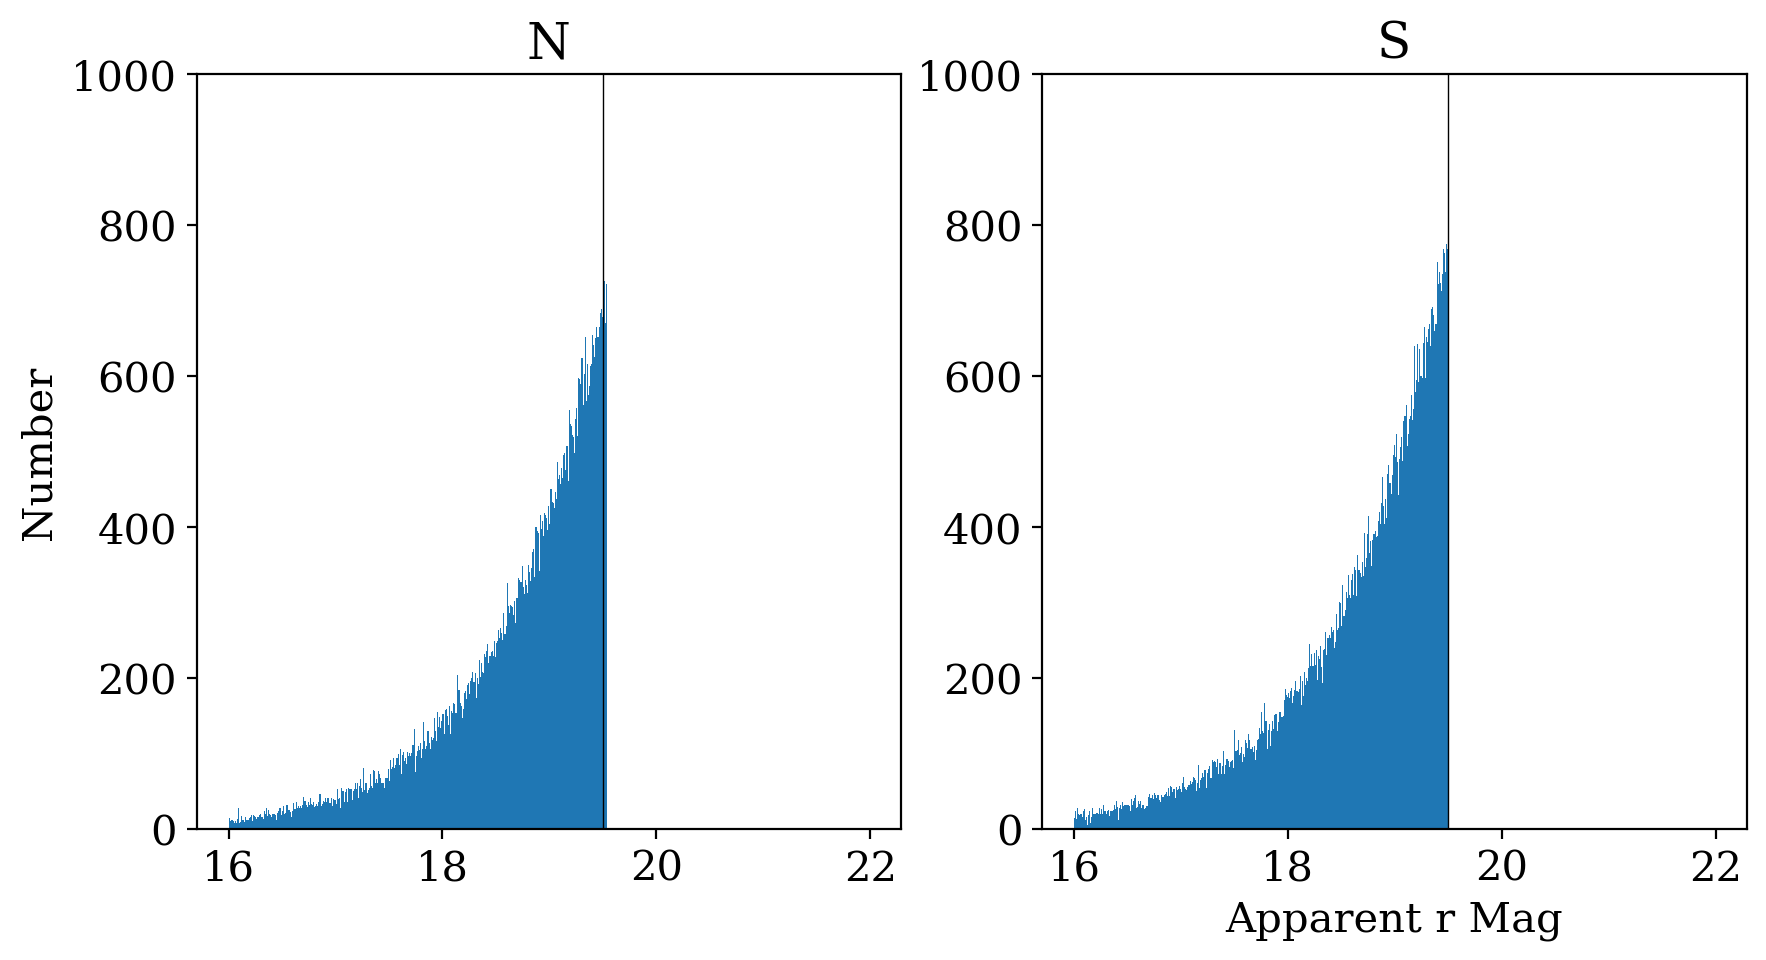

In [16]:
plt.figure(figsize=(10,5), dpi=200)

plt.subplot(121)
plt.title('N')
plt.hist(N_bright['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.5,19.5],[0,5000], lw=0.5, color='k')
plt.ylim(0,1000)
plt.ylabel('Number')

plt.subplot(122)
plt.title('S')
plt.hist(S_bright['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.5,19.5],[0,5000], lw=0.5, color='k')
plt.ylim(0,1000)
plt.xlabel('Apparent r Mag')

plt.show()

Bright limits: N - 19.539993, S - 19.5

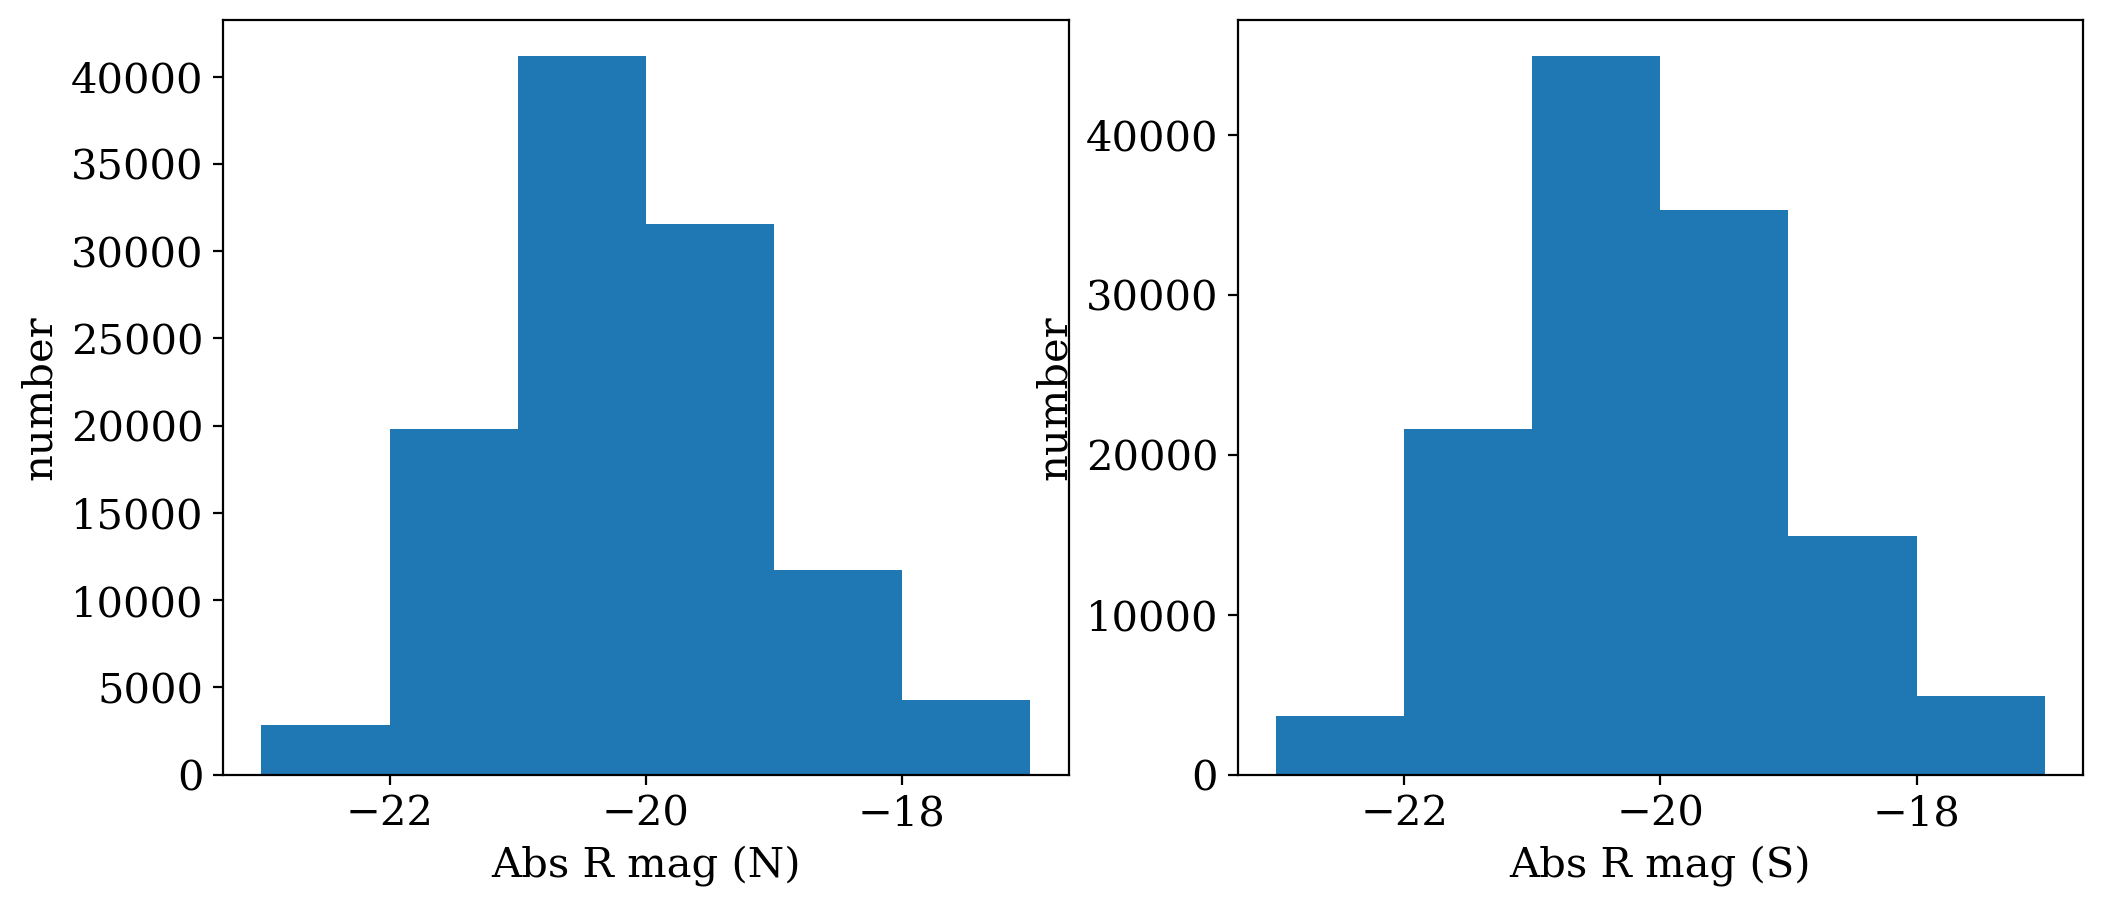

In [17]:
plt.figure(figsize=(12,5),dpi=200)
M_range = np.arange(-23,-16,1)
plt.subplot(121)
plt.hist(N['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag (N)')
plt.ylabel('number')

plt.subplot(122)
plt.hist(S['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag (S)')
plt.ylabel('number')

plt.savefig('../figures/week6-7/sv3_absmag_maglims.png')


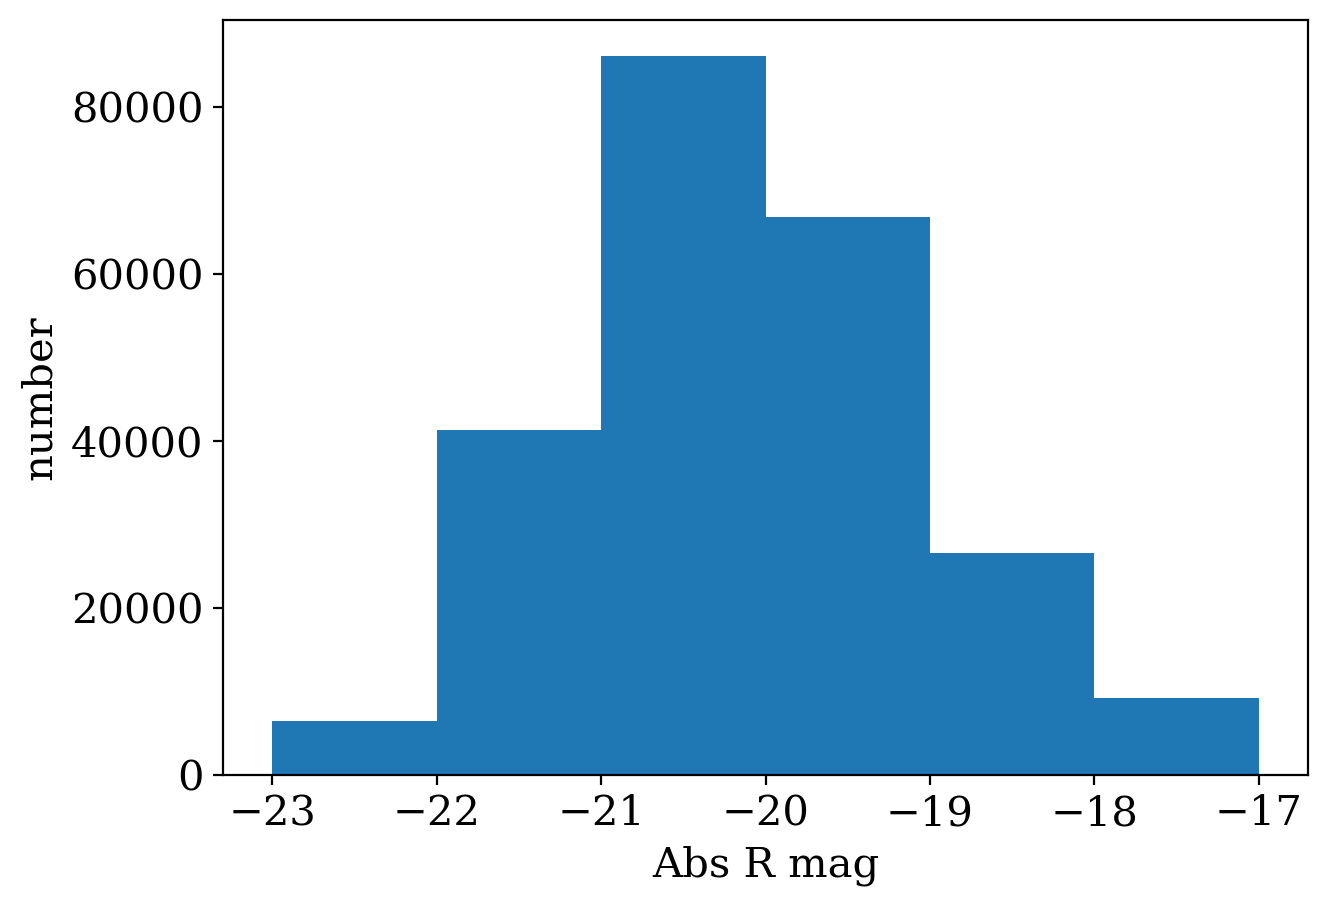

In [18]:
plt.figure(figsize=(7,5),dpi=200)
M_range = np.arange(-23,-16,1)
plt.hist(data['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag')
plt.ylabel('number')

plt.savefig('../figures/week6-7/sv3_absmag_maglims_comb.png')


Finding vmax envelope

In [19]:
M_range = np.arange(-23,-12,0.1)
redshift_cut = np.where(data['Z'] <= 0.3)[0]
redshift_cut_bright = np.where(data_bright['Z'] <= 0.3)[0]
redshift_cut_N = np.where(N['Z'] <= 0.3)[0]
redshift_cut_S = np.where(S['Z'] <= 0.3)[0]

def zmax_G(m):
    return 10**(-(m+22.8)/5.4)

def zmax(m):
    return 10**(-(m+22)/5)

def zmax_bright(m):
    return 10**(-(m+22.9)/5.15)

cosmo = FlatLambdaCDM(H0=100, Om0=0.3) 
zmax_clipped = np.clip(zmax(data['ABSMAG_R']), a_min=None, a_max=0.3)
data['VMAX_EST'] = fsky*cosmo.comoving_volume(zmax_clipped)

#print(data['VMAX_EST']) #too large

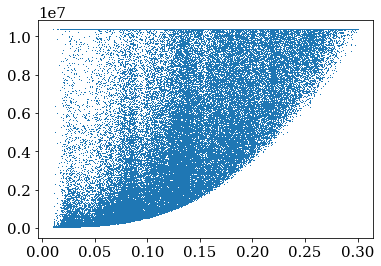

In [20]:
plt.figure()
plt.plot(data['Z'][redshift_cut], data['VMAX_EST'][redshift_cut], lw=0, marker=',')
plt.show()

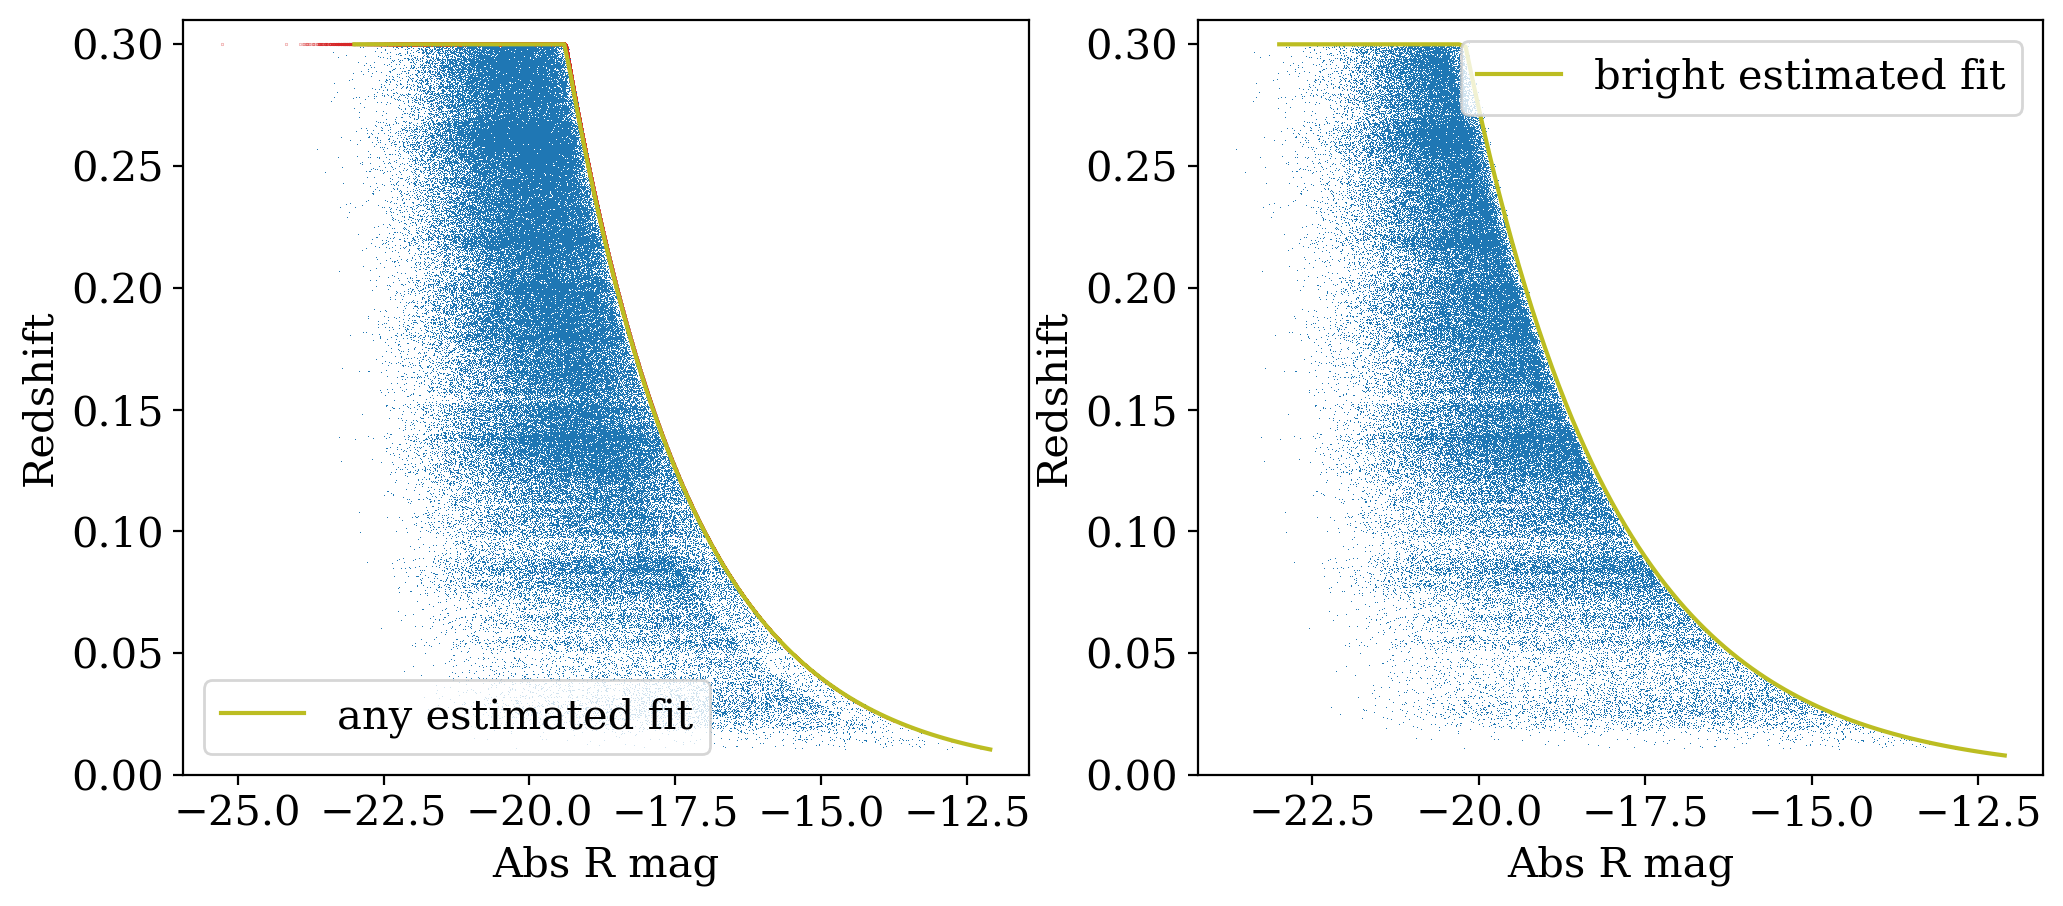

In [21]:
zmax_range = np.clip(zmax(M_range),a_min=None,a_max=0.3)
zmax_range_bright = np.clip(zmax_bright(M_range),a_min=None,a_max=0.3)
fig, ax = plt.subplots(figsize=(12,5), dpi=200)

ax1 = plt.subplot(121)
ax1.plot(data['ABSMAG_R'][redshift_cut], data['Z'][redshift_cut], lw=0, marker=',')
#ax.set_yscale('log')
ax1.plot(M_range, zmax_range, label='any estimated fit', color='tab:olive')
ax1.scatter(data['ABSMAG_R'], zmax_clipped, color='tab:red', s=0.01)
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)

ax2 = plt.subplot(122)
ax2.plot(data_bright['ABSMAG_R'][redshift_cut_bright], data_bright['Z'][redshift_cut_bright], lw=0, marker=',')
#ax2.set_yscale('log')
ax2.plot(M_range, zmax_range_bright, label='bright estimated fit', color='tab:olive')
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)
plt.savefig('../figures/week3/absmag_r_v_redshift_clustering')


Attempt to do k-correction between Sloan and Legacy filters - confused about this

/tmp/ipykernel_26786/229087394.py:8: RuntimeWarning: invalid value encountered in log10
  k_diff = 5*np.log10(dmax) - 5*np.log10(dmax_primed)


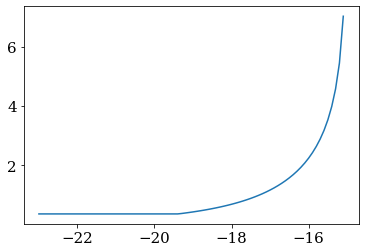

In [22]:
def find_dm(M):
    zmax_clip = np.clip(zmax(M),a_min=None,a_max=0.3)
    zmax_clip_primed = (1 + zmax_clip)/1.04 - 1
    
    dmax = cosmo.comoving_distance(zmax_clip).to_value()
    dmax_primed = cosmo.comoving_distance(zmax_clip_primed).to_value()
    
    k_diff = 5*np.log10(dmax) - 5*np.log10(dmax_primed)
    return k_diff
    
k_diff = find_dm(M_range)

plt.figure()
plt.plot(M_range, k_diff)
plt.show()

(0.0, 0.31)

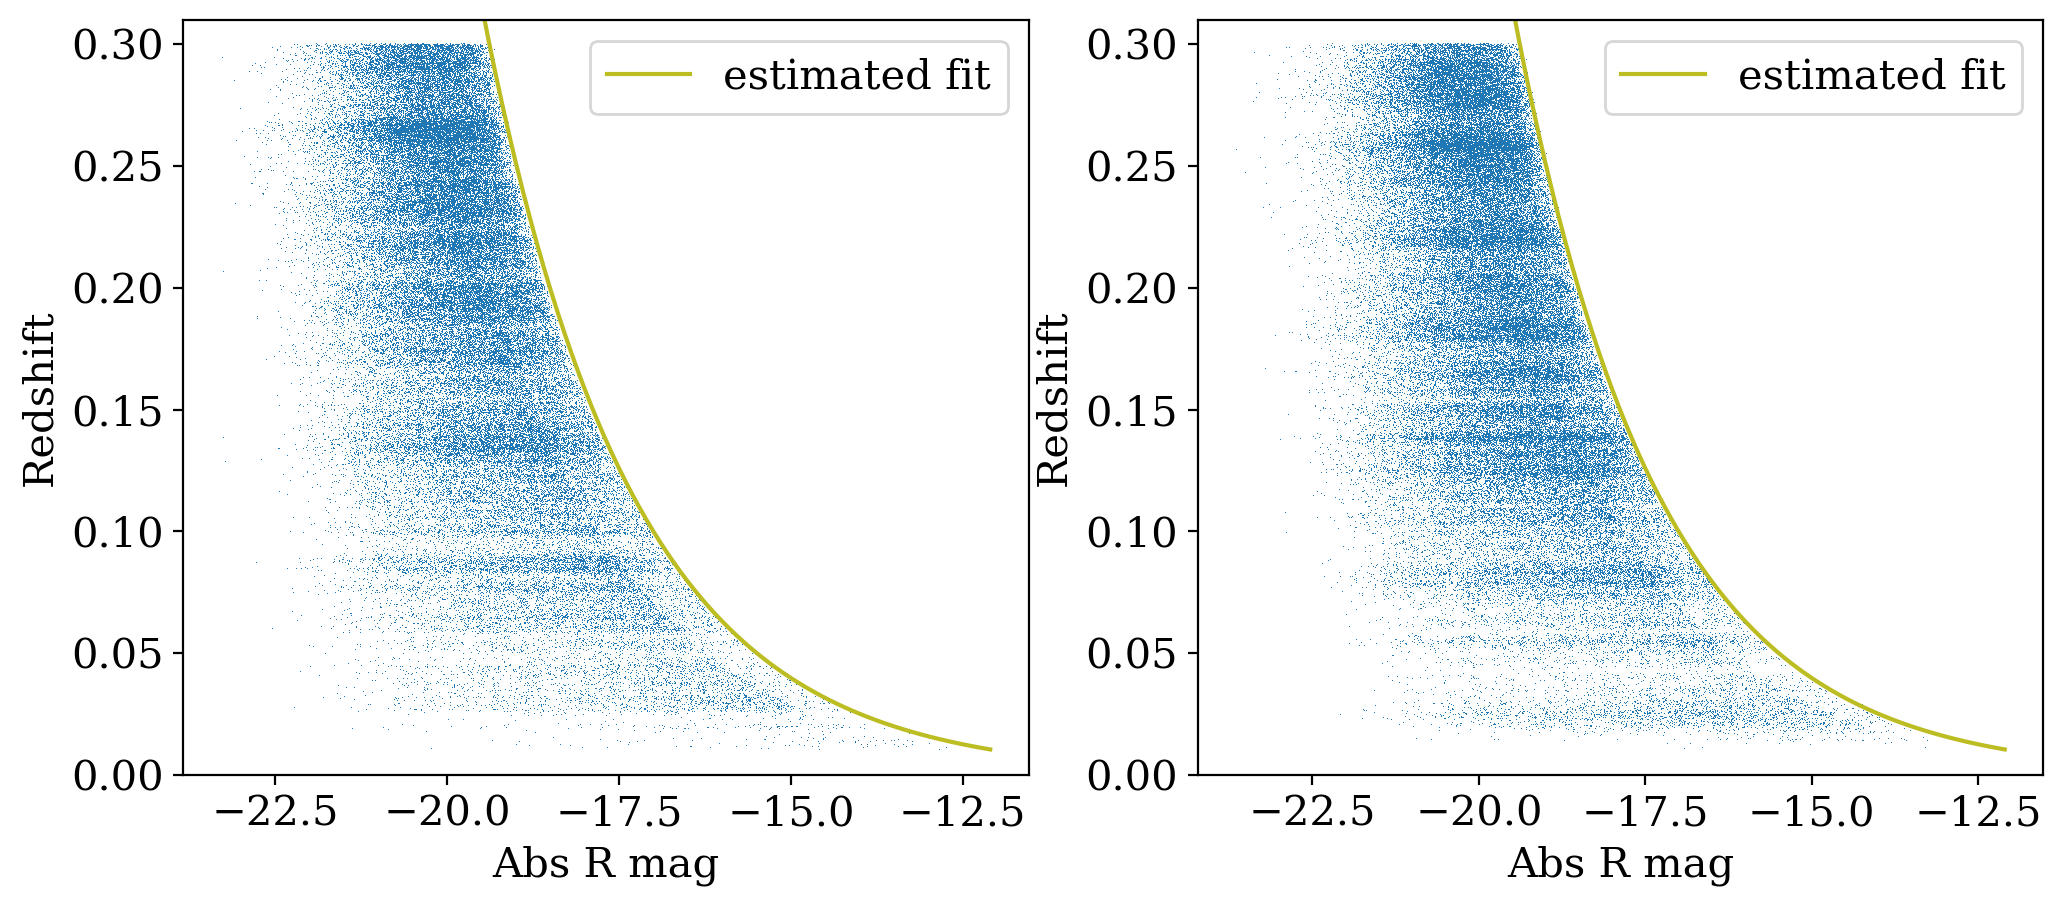

In [23]:
fig, ax = plt.subplots(figsize=(12,5), dpi=200)

ax1 = plt.subplot(121)
ax1.plot(N['ABSMAG_R'][redshift_cut_N], N['Z'][redshift_cut_N], lw=0, marker=',')
#ax.set_yscale('log')
ax1.plot(M_range, zmax(M_range), label='estimated fit', color='tab:olive')
#ax.plot(data['ABSMAG_R'][redshift_cut], zmax_clipped[redshift_cut], lw=0, marker=',', color='tab:red')
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)
ax2 = plt.subplot(122)
ax2.plot(S['ABSMAG_R'][redshift_cut_S], S['Z'][redshift_cut_S], lw=0, marker=',')
#ax.set_yscale('log')
ax2.plot(M_range, zmax(M_range), label='estimated fit', color='tab:olive')
#ax.plot(data['ABSMAG_R'][redshift_cut], zmax_clipped[redshift_cut], lw=0, marker=',', color='tab:red')
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)
#plt.savefig('figures/week3/absmag_r_v_redshift_clustering_N_S')

Already cut to z < 0.6 - also filtered on redshift security?

Use volume envelope to estimate LF - not normalised properly?

In [24]:
def phi(M, phi_star=8.32*10**(-3), M_star=-20.3, alpha=-0.23): #luminosity function
    return np.log(10)*phi_star*10**(0.4*(alpha+1)*(-M+M_star))*np.exp(-10**(0.4*(-M+M_star)))/2.5

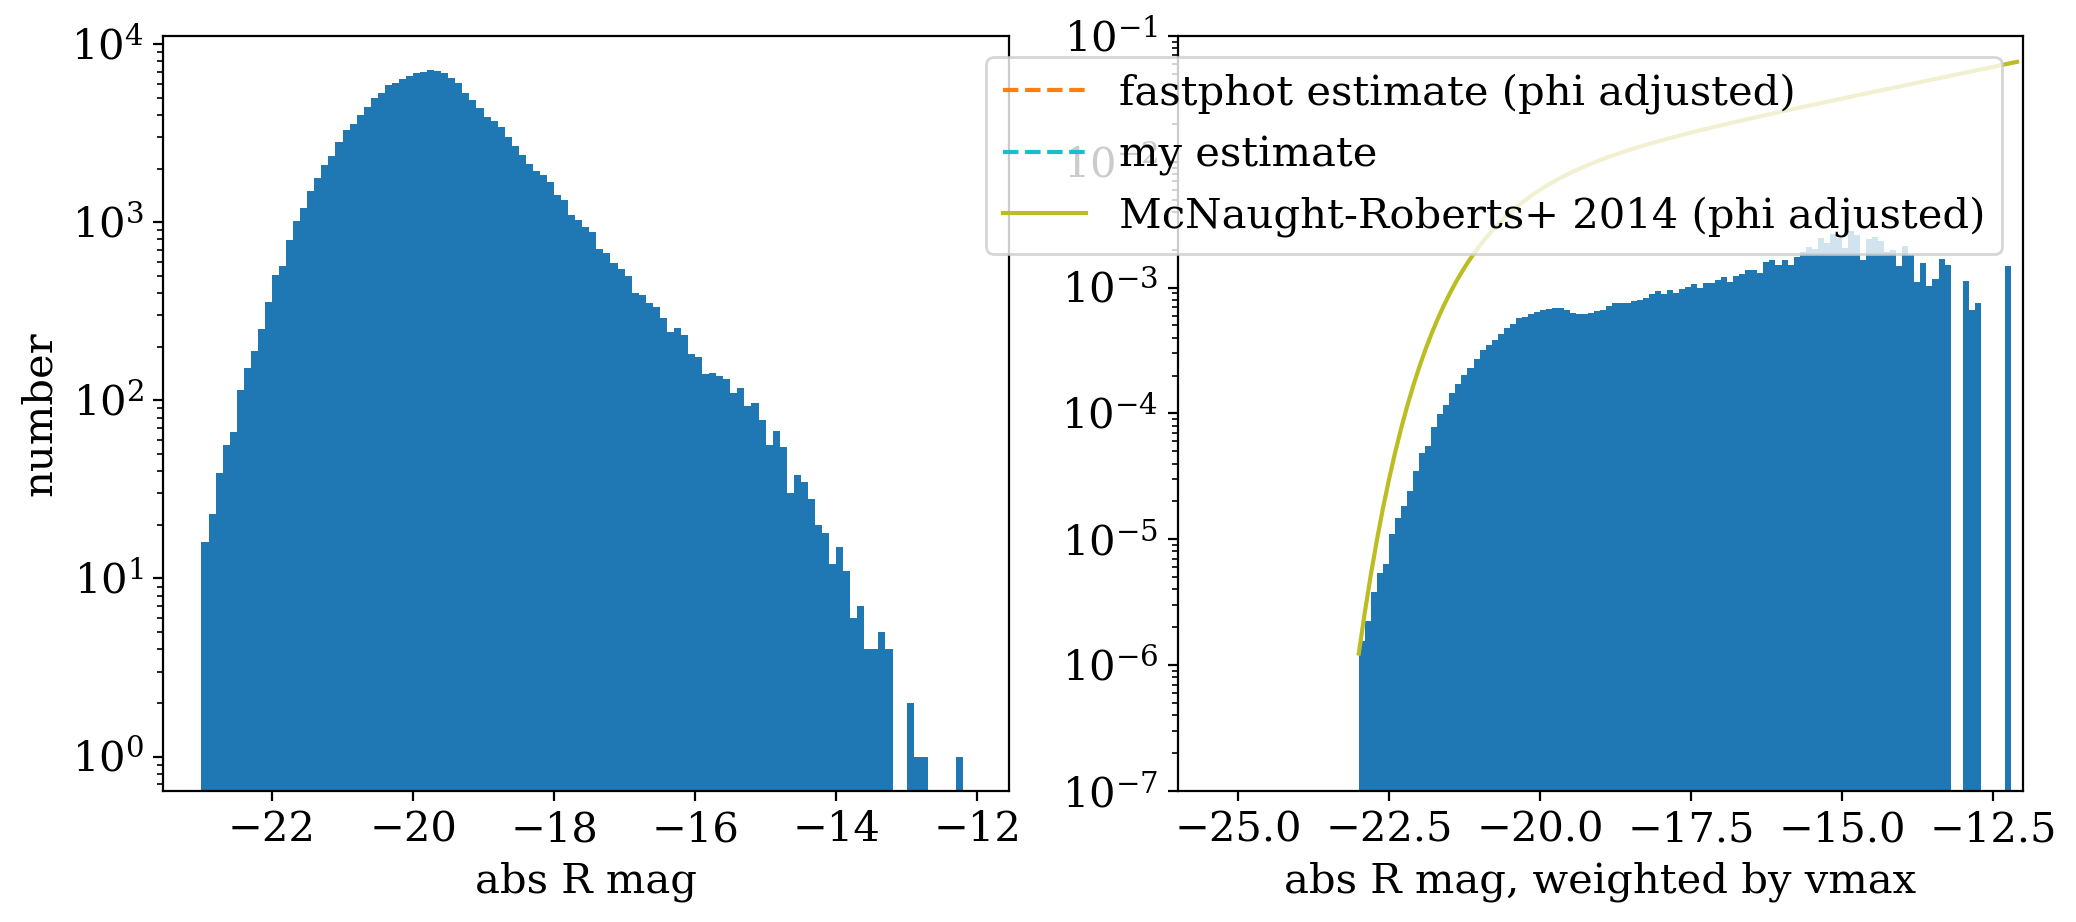

In [25]:
phi_star_est = 0.00000000003
M_star_est = -22 #-21.5#-19.7+5*np.log10(5) for b-band
alpha_est = -1.25 #-1.07

plt.figure(figsize=(12,5),dpi=200)
ax1 = plt.subplot(121)
ax1.hist(data['ABSMAG_R'][redshift_cut], bins=M_range)
ax1.set_yscale('log')
plt.xlabel('abs R mag')
plt.ylabel('number')
ax2 = plt.subplot(122)
ax2.set_yscale('log')
ax2.hist(data['ABSMAG_R'][redshift_cut], bins=M_range, weights=1/data['VMAX_EST'][redshift_cut])
#ax2.plot(M_range, phi(M_range, phi_star=0.000000000015, M_star=-20, alpha=-1.02))
ax2.plot(M_range, phi(M_range, phi_star=0.000000001, M_star=M_star_est, alpha=alpha_est), label='fastphot estimate (phi adjusted)', ls='--')
ax2.plot(M_range, phi(M_range, phi_star=0.0000000013, M_star=-21.3, alpha=alpha_est), label='my estimate', ls='--', color='tab:cyan')
ax2.plot(M_range, phi(M_range, phi_star=0.0000000015, M_star=-20.7, alpha=-1.25), label='McNaught-Roberts+ 2014 (phi adjusted)', color='tab:olive')
ax2.plot(M_range, phi(M_range, phi_star=10**(-2.03), M_star=-20.7, alpha=-1.25), color='tab:olive')
plt.xlabel('abs R mag, weighted by vmax')
plt.ylim(10**-7,10**-1)
plt.xlim(-26,-12)
plt.legend()
#plt.savefig('figures/week3/clustering_abs_rmag_hist_weighted.png')

Other plots: emission line strength vs r mag, sky coverage

In [26]:
data['z_mag'] = 22.5 - 2.5*np.log10(data['flux_z_dered'])
data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
data['g_mag'] = 22.5 - 2.5*np.log10(data['flux_g_dered'])
data['r_mag'] = 22.5 - 2.5*np.log10(data['flux_r_dered'])

data_bright['z_mag'] = 22.5 - 2.5*np.log10(data_bright['flux_z_dered'])
data_bright['w1_mag'] = 22.5 - 2.5*np.log10(data_bright['flux_w1_dered'])
data_bright['g_mag'] = 22.5 - 2.5*np.log10(data_bright['flux_g_dered'])
data_bright['r_mag'] = 22.5 - 2.5*np.log10(data_bright['flux_r_dered'])

N['z_mag'] = 22.5 - 2.5*np.log10(N['flux_z_dered'])
N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
N['g_mag'] = 22.5 - 2.5*np.log10(N['flux_g_dered'])
N['r_mag'] = 22.5 - 2.5*np.log10(N['flux_r_dered'])

S['z_mag'] = 22.5 - 2.5*np.log10(S['flux_z_dered'])
S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
S['g_mag'] = 22.5 - 2.5*np.log10(S['flux_g_dered'])
S['r_mag'] = 22.5 - 2.5*np.log10(S['flux_r_dered'])

N_bright['z_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_z_dered'])
N_bright['w1_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_w1_dered'])
N_bright['g_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_g_dered'])
N_bright['r_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_r_dered'])

S_bright['z_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_z_dered'])
S_bright['w1_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_w1_dered'])
S_bright['g_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_g_dered'])
S_bright['r_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_r_dered'])

/tmp/ipykernel_26786/3691202683.py:2: RuntimeWarning: invalid value encountered in log10
  data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
/tmp/ipykernel_26786/3691202683.py:7: RuntimeWarning: invalid value encountered in log10
  data_bright['w1_mag'] = 22.5 - 2.5*np.log10(data_bright['flux_w1_dered'])
/tmp/ipykernel_26786/3691202683.py:12: RuntimeWarning: invalid value encountered in log10
  N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
/tmp/ipykernel_26786/3691202683.py:17: RuntimeWarning: invalid value encountered in log10
  S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
/tmp/ipykernel_26786/3691202683.py:22: RuntimeWarning: invalid value encountered in log10
  N_bright['w1_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_w1_dered'])
/tmp/ipykernel_26786/3691202683.py:27: RuntimeWarning: invalid value encountered in log10
  S_bright['w1_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_w1_dered'])


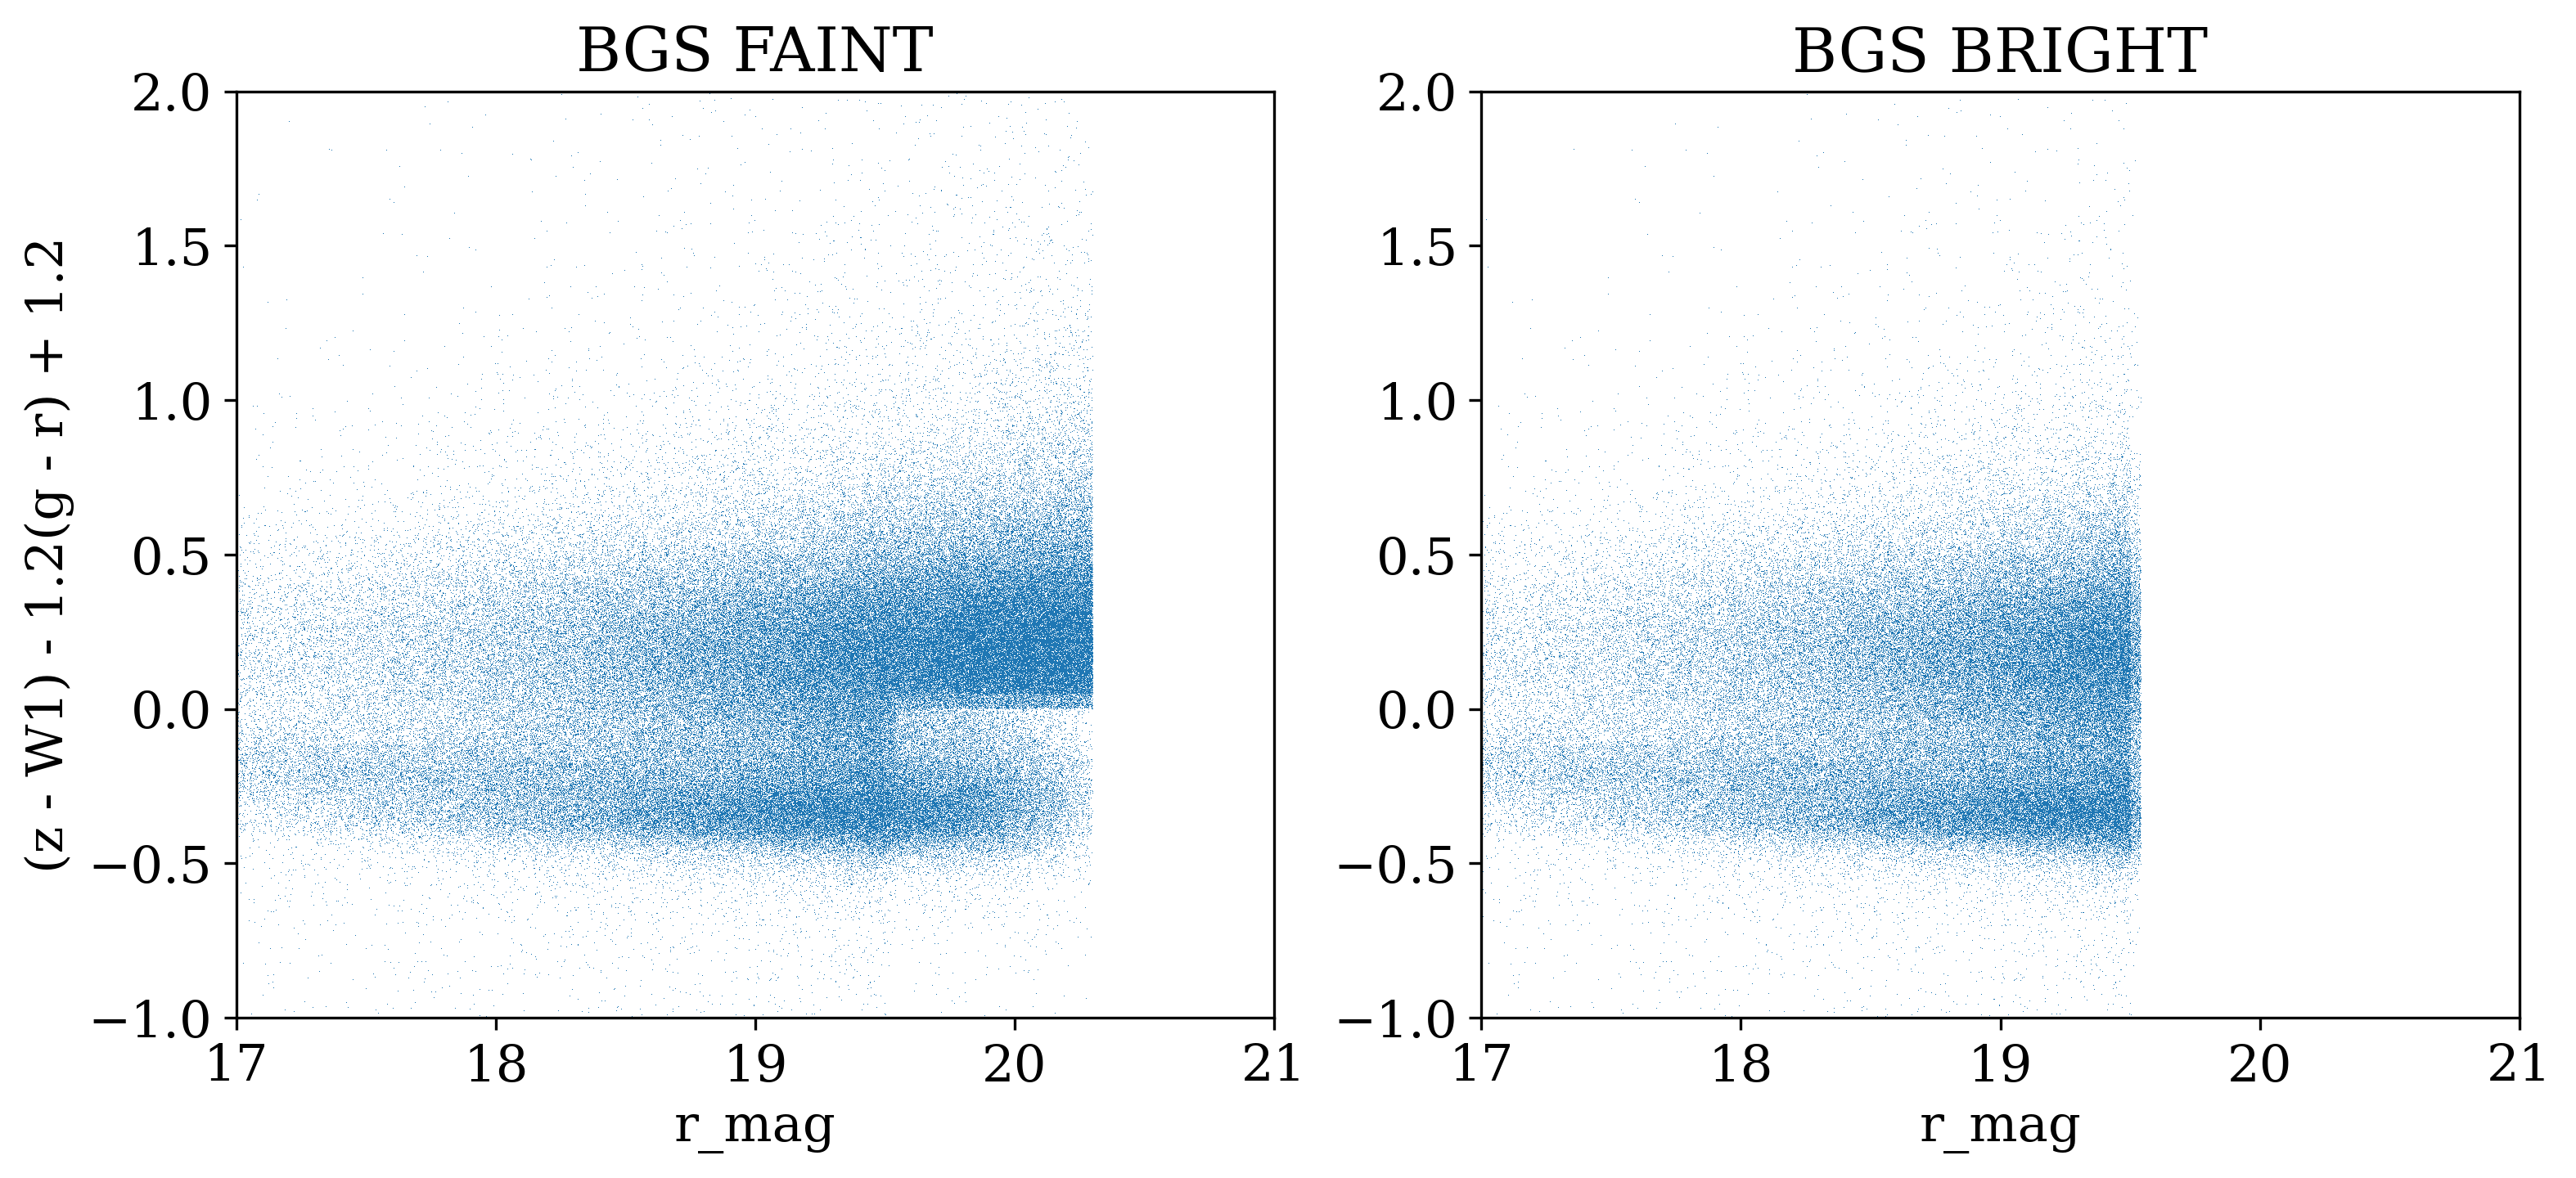

In [27]:
Y = (data['z_mag'] - data['w1_mag']) - 1.2*(data['g_mag'] - data['r_mag']) + 1.2
Y_N = (N['z_mag'] - N['w1_mag']) - 1.2*(N['g_mag'] - N['r_mag']) + 1.2
Y_S = (S['z_mag'] - S['w1_mag']) - 1.2*(S['g_mag'] - S['r_mag']) + 1.2
Y_N_bright = (N_bright['z_mag'] - N_bright['w1_mag']) - 1.2*(N_bright['g_mag'] - N_bright['r_mag']) + 1.2
Y_S_bright = (S_bright['z_mag'] - S_bright['w1_mag']) - 1.2*(S_bright['g_mag'] - S_bright['r_mag']) + 1.2
Y_bright = (data_bright['z_mag'] - data_bright['w1_mag']) - 1.2*(data_bright['g_mag'] - data_bright['r_mag']) + 1.2

plt.figure(figsize=(12,5), dpi=300)
plt.subplot(121)
plt.title('BGS FAINT')
plt.plot(N['r_mag'], Y_N, lw=0, marker=',', color='tab:blue')
plt.plot(S['r_mag'], Y_S, lw=0, marker=',', color='tab:blue')
plt.ylim((-1,2))
plt.xlim((17,21))
plt.ylabel('(z - W1) - 1.2(g - r) + 1.2')
plt.xlabel('r_mag')
plt.subplot(122)
plt.title('BGS BRIGHT')
plt.plot(N_bright['r_mag'], Y_N_bright, lw=0, marker=',', color='tab:blue')
plt.plot(S_bright['r_mag'], Y_S_bright, lw=0, marker=',', color='tab:blue')
plt.ylim((-1,2))
plt.xlim((17,21))
plt.xlabel('r_mag')
plt.savefig('../figures/week3/clustering_Fig4.png')

In [28]:
def ra_moll(ra):
    return np.deg2rad(120-ra)

In [29]:
N_da02 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_N_clustering.dat.fits')
S_da02 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_S_clustering.dat.fits')

In [30]:
from matplotlib.lines import Line2D

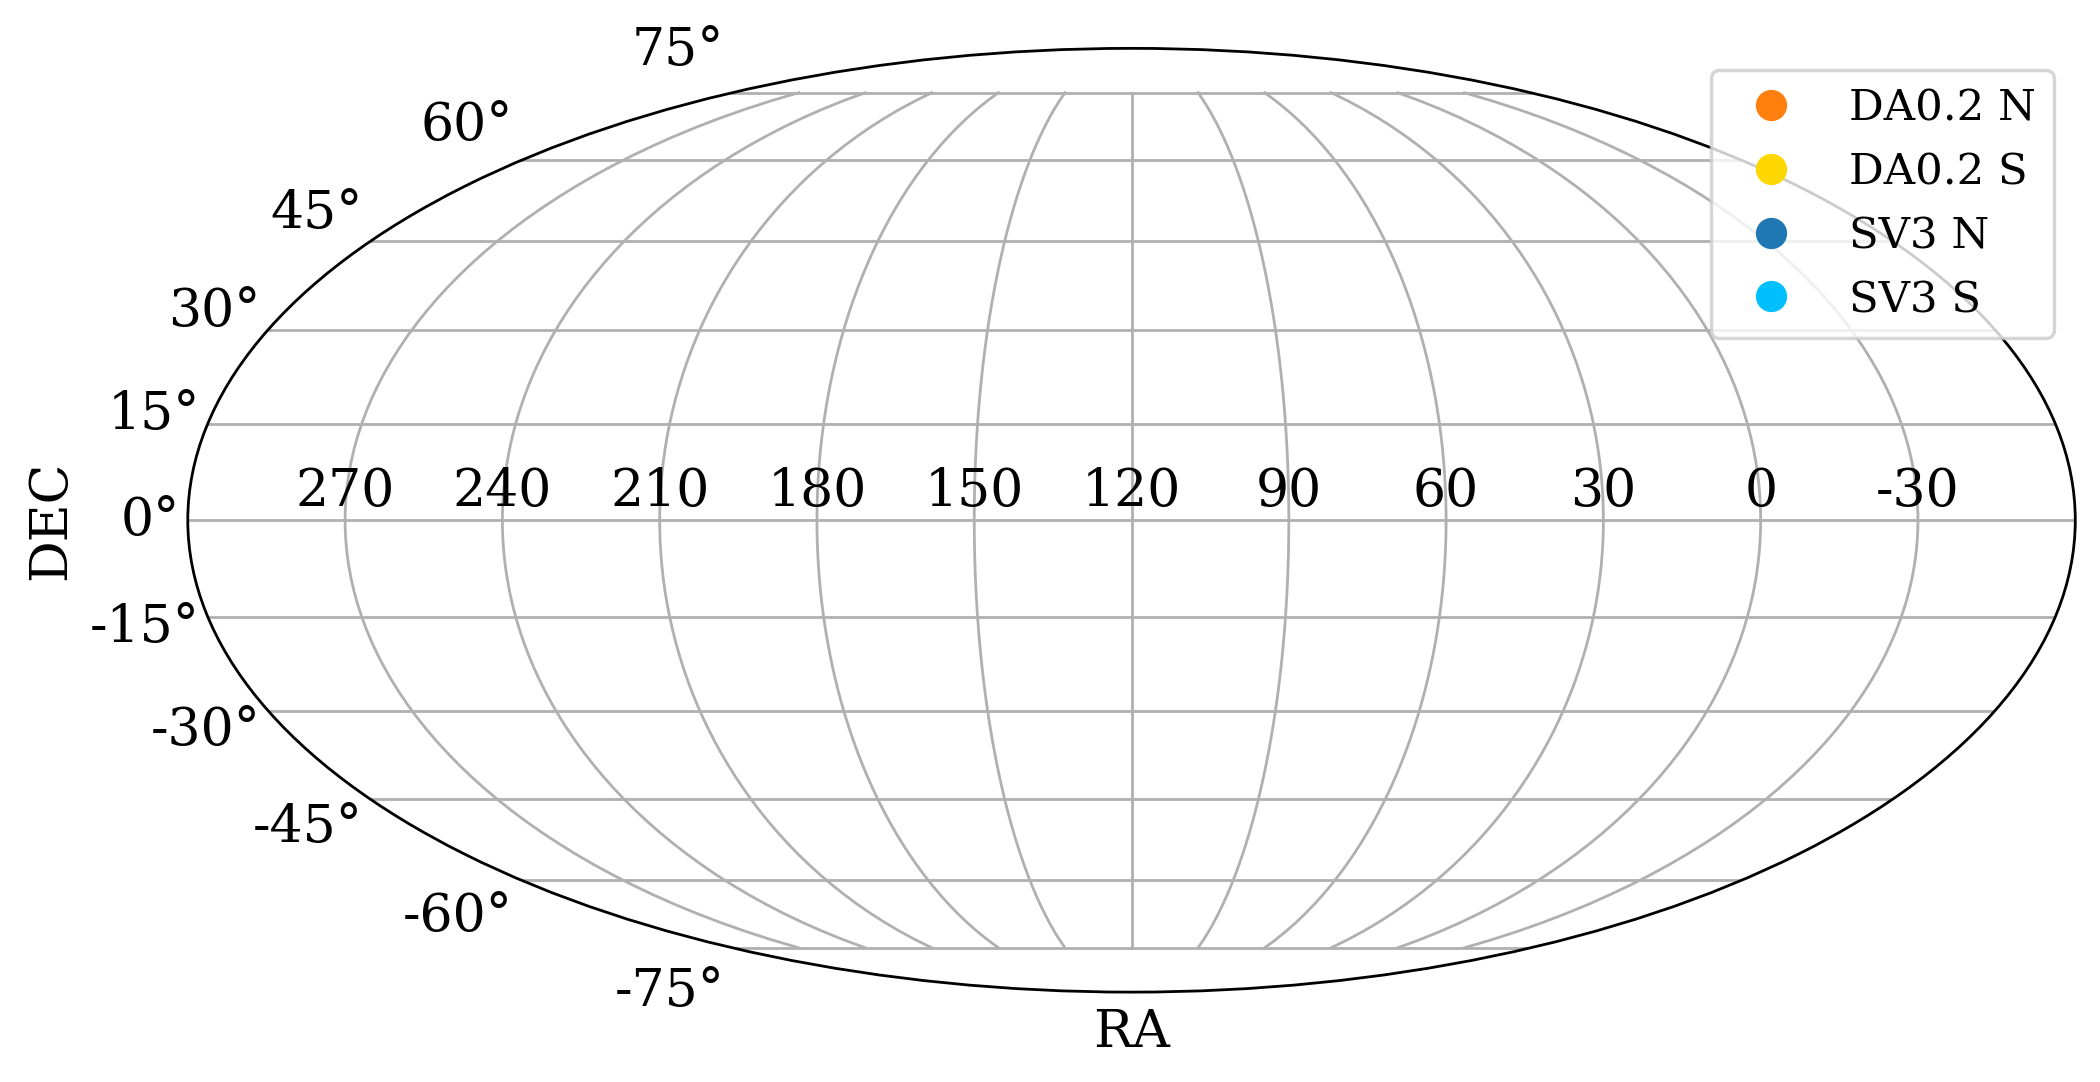

In [31]:
plt.figure(figsize=(10,5), dpi=250)
ax = plt.subplot(projection='mollweide')

#ax.plot(ra_moll(N_da02['RA']), np.deg2rad(N_da02['DEC']), lw=0, marker=',', label='N, DA0.2', color='tab:orange')
#ax.plot(ra_moll(S_da02['RA']), np.deg2rad(S_da02['DEC']), lw=0, marker=',', label='S, DA0.2', color='gold')

#ax.plot(ra_moll(N_bright['RA']), np.deg2rad(N_bright['DEC']), lw=0, marker=',', label='N, SV3', color='tab:blue')
#ax.plot(ra_moll(S_bright['RA']), np.deg2rad(S_bright['DEC']), lw=0, marker=',', label='S, SV3', color='deepskyblue')

ax.set_xticks([np.deg2rad(-150),np.deg2rad(-120),np.deg2rad(-90),np.deg2rad(-60),np.deg2rad(-30),np.deg2rad(0),np.deg2rad(30),np.deg2rad(60),np.deg2rad(90),np.deg2rad(120),np.deg2rad(150)],
             [120--150,120--120,120--90,120--60,120--30,120-0,120-30,120-60,120-90,120-120,120-150])
plt.xlabel('RA')
plt.ylabel('DEC')

legend_elements = [
                   Line2D([0], [0], marker='o', color='tab:orange', label='DA0.2 N',
                          linestyle='',ms=8),
                    Line2D([0], [0], marker='o', color='gold', label='DA0.2 S',
                           linestyle='',ms=8),
                    Line2D([0], [0], marker='o', color='tab:blue', label='SV3 N',
                          linestyle='',ms=8),
                    Line2D([0], [0], marker='o', color='deepskyblue', label='SV3 S',
                         linestyle='', ms=8),]

plt.legend(handles=legend_elements, fontsize='small')

plt.grid(True)

plt.savefig('../figures/interim/mollweidsky_grid.png', transparent=True)

In [32]:
dec_slice = np.where(np.logical_and(data['DEC'] >= 40, data['DEC'] <= 50))[0]
redshift_cut = np.where(data['Z'] <= 0.5)[0]
print(dec_slice, redshift_cut)

cone_cut = np.intersect1d(dec_slice, redshift_cut)
print(cone_cut)

RA_rad = np.deg2rad(data['RA'])

[ 35499  35500  35501 ... 102502 102503 102504] [     0      1      2 ... 241743 241744 241745]
[ 35499  35500  35501 ... 102502 102503 102504]


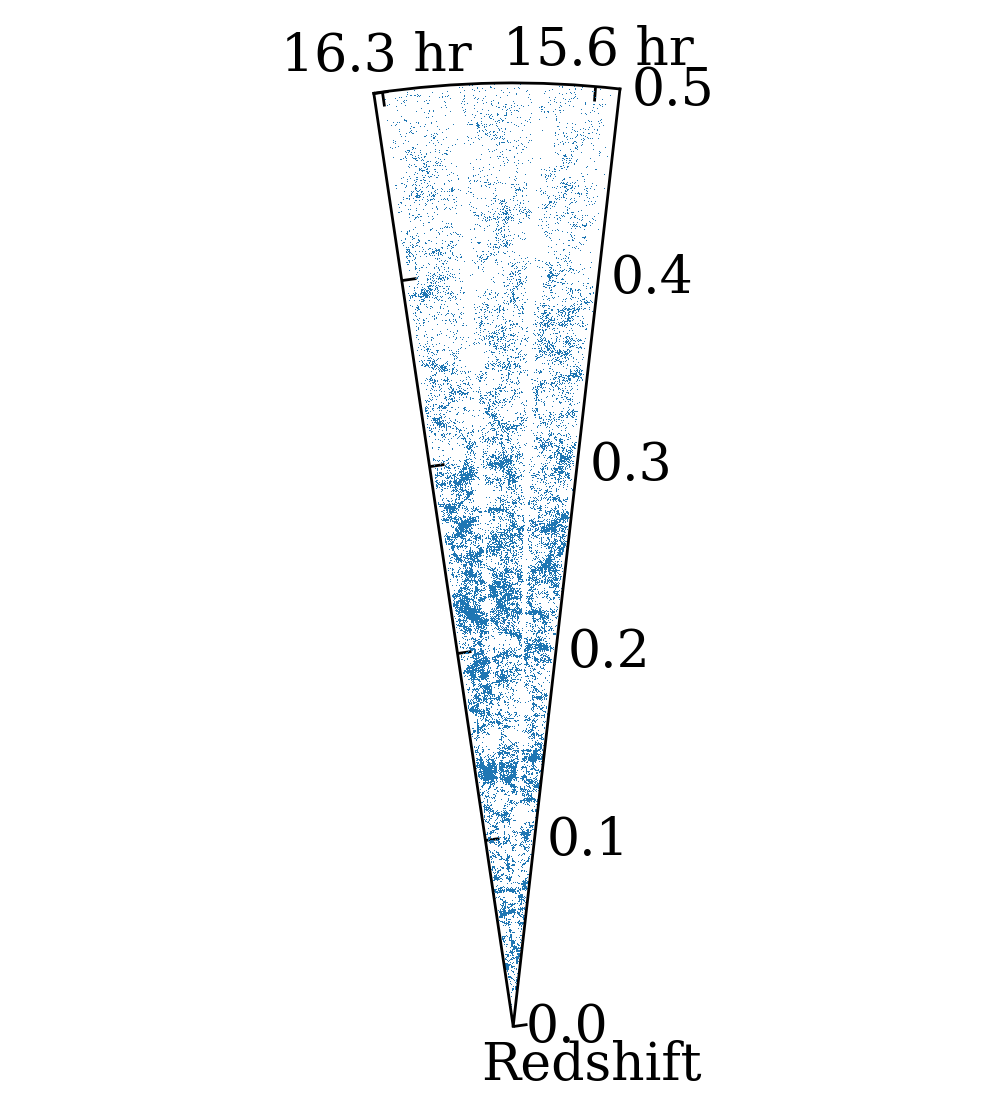

In [33]:
fig, ax = plt.subplots(figsize=(10,5),subplot_kw={'projection': 'polar'}, dpi=250)
plt.grid(False)
ax.plot(RA_rad[cone_cut],data['Z'][cone_cut], lw=0, marker=',', color='tab:blue')
ax.set_theta_offset(np.deg2rad(210))
plt.ylim(0,0.5)
plt.xlim(np.deg2rad(233.5),np.deg2rad(248.5))
ax.set_xticks([np.deg2rad(235),np.deg2rad(248)])
ax.set_xticklabels(['15.6 hr', '16.3 hr'])
plt.xlabel('Redshift', x=0.6)

ax.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.savefig('../figures/interim/sv3_cone_plot.png')

Attempt to calculate number density (too low due to large volume?) and FKP weights

In [34]:
def fkp_model(n,p):
    return 1/(1 + n*p)

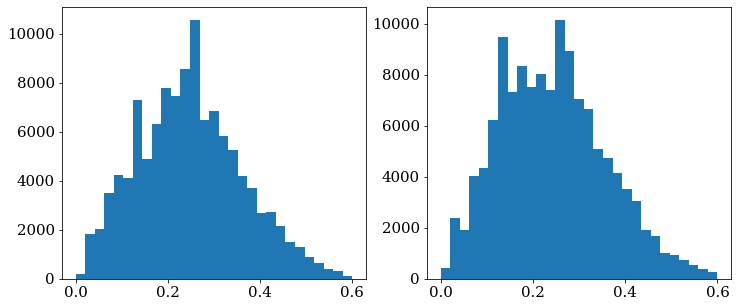

In [35]:
z_bins = np.linspace(0,0.6,30)#np.arange(0,0.61,0.05)
plt.figure(figsize=(12,5))
plt.subplot(121)
count_N = plt.hist(N['Z'], bins=z_bins)
plt.subplot(122)
count_S = plt.hist(S['Z'], bins=z_bins)
plt.show()